## DISEASE PREDICTION PROJECT ##

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

#### READING THE TRAINING DATASET AND EXPLORING IT 

In [3]:
data = pd.read_csv('/kaggle/input/disease-prediction-using-machine-learning/Training.csv') 

In [4]:
data.head(10)

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   
5        0          1                     1                    0          0   
6        1          0                     1                    0          0   
7        1          1                     0                    0          0   
8        1          1                     1                    0          0   
9        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   
5       0           0             0        0                 0  ...         0   
6       0           0             0        0                 0  ...         0   
7       0           0             0        0                 0  ...         0   
8       0           0             0        0                 0  ...         0   
9       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   
5             0                    0                     0   
6             0                    0                     0   
7             0                    0                     0   
8             0                    0                     0   
9             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   
5                   0        0                     0                  0   
6                   0        0                     0                  0   
7                   0        0                     0                  0   
8                   0        0                     0                  0   
9                   0        0                     0                  0   

          prognosis  Unnamed: 133  
0  Fungal infection           NaN  
1  Fungal infection           NaN  
2  Fungal infection           NaN  
3  Fungal infection           NaN  
4  Fungal infection           NaN  
5  Fungal infection           NaN  
6  Fungal infection           NaN  
7  Fungal infection           NaN  
8  Fungal infection           NaN  
9  Fungal infection           NaN  

[10 rows x 134 columns]

## DATA PREPROCESSING

In [5]:
# Drop irrelevant columns (e.g., 'Unnamed: 133' which contains NaN)
data.drop(columns=['Unnamed: 133'], inplace=True, errors='ignore')

In [6]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())




Missing Values in Each Column:

itching                 0

skin_rash               0

nodal_skin_eruptions    0

continuous_sneezing     0

shivering               0

                       ..

inflammatory_nails      0

blister                 0

red_sore_around_nose    0

yellow_crust_ooze       0

prognosis               0

Length: 133, dtype: int64


#### this indicates that there are no null values in the dataset

In [7]:
# Encode the target variable ('prognosis') if it is categorical
if data['prognosis'].dtype == 'object':
    le = LabelEncoder()
    data['prognosis_encoded'] = le.fit_transform(data['prognosis'])
else:
    data['prognosis_encoded'] = data['prognosis']

#### Since our target feature/column is a categorical in nature, we have to encode it 

In [8]:
# Define features and target variable
features = data.columns.drop(['prognosis', 'prognosis_encoded'], errors='ignore')
target = 'prognosis_encoded'

In [9]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  prognosis_encoded  
0  Fungal infection                 15  
1  Fungal infection                 15  
2  Fungal infection                 15  
3  Fungal infection                 15  
4  Fungal infection                 15  

[5 rows x 134 columns]

In [10]:


# Summary statistics of the dataset
print("\nSummary Statistics:")
display(data.describe())




Summary Statistics:


itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count       4920.000000  ...  4920.000000  4920.000000   4920.000000   
mean           0.021951  ...     0.021951     0.021951      0.023171   
std            0.146539  ...     0.146539     0.146539      0.150461   
min            0.000000  ...     0.000000     0.000000      0.000000   
25%            0.000000  ...     0.000000     0.000000      0.000000   
50%            0.000000  ...     0.000000     0.000000      0.000000   
75%            0.000000  ...     0.000000     0.000000      0.000000   
max            1.000000  ...     1.000000     1.000000      1.000000   

       silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count          4920.000000           4920.000000         4920.000000   
mean              0.023171              0.023171            0.023171   
std               0.150461              0.150461            0.150461   
min               0.000000              0.000000            0.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              0.000000            0.000000   
max               1.000000              1.000000            1.000000   

           blister  red_sore_around_nose  yellow_crust_ooze  prognosis_encoded  
count  4920.000000           4920.000000        4920.000000        4920.000000  
mean      0.023171              0.023171           0.023171          20.000000  
std       0.150461              0.150461           0.150461          11.833362  
min       0.000000              0.000000           0.000000           0.000000  
25%       0.000000              0.000000           0.000000          10.000000  
50%       0.000000              0.000000           0.000000          20.000000  
75%       0.000000              0.000000           0.000000          30.000000  
max       1.000000              1.000000           1.000000          40.000000  

[8 rows x 133 columns]

## CHECKING FOR OUTLIERS

In [11]:
# Outlier detection using Z-score method on numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('prognosis_encoded')

# Check if there are any numerical features
if numerical_features:
    # Calculate Z-scores
    z_scores = stats.zscore(data[numerical_features])
    abs_z_scores = np.abs(z_scores)
    outlier_mask = (abs_z_scores > 3).any(axis=1)
    outliers = data[outlier_mask]
    print(f"Number of outliers detected: {outliers.shape[0]}")
    display(outliers)
else:
    print("No numerical features available for outlier detection.")

Number of outliers detected: 4656


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  scurring  skin_peeling  silver_like_dusting  small_dents_in_nails  \
0     ...         0             0                    0                     0   
1     ...         0             0                    0                     0   
2     ...         0             0                    0                     0   
3     ...         0             0                    0                     0   
4     ...         0             0                    0                     0   
...   ...       ...           ...                  ...                   ...   
4915  ...         0             0                    0                     0   
4916  ...         1             0                    0                     0   
4917  ...         0             0                    0                     0   
4918  ...         0             1                    1                     1   
4919  ...         0             0                    0                     0   

      inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                      0        0                     0                  0   
1                      0        0                     0                  0   
2                      0        0                     0                  0   
3                      0        0                     0                  0   
4                      0        0                     0                  0   
...                  ...      ...                   ...                ...   
4915                   0        0                     0                  0   
4916                   0        0                     0                  0   
4917                   0        0                     0                  0   
4918                   1        0                     0                  0   
4919                   0        1                     1                  1   

                                    prognosis  prognosis_encoded  
0                            Fungal infection                 15  
1                            Fungal infection                 15  
2                            Fungal infection                 15  
3                         

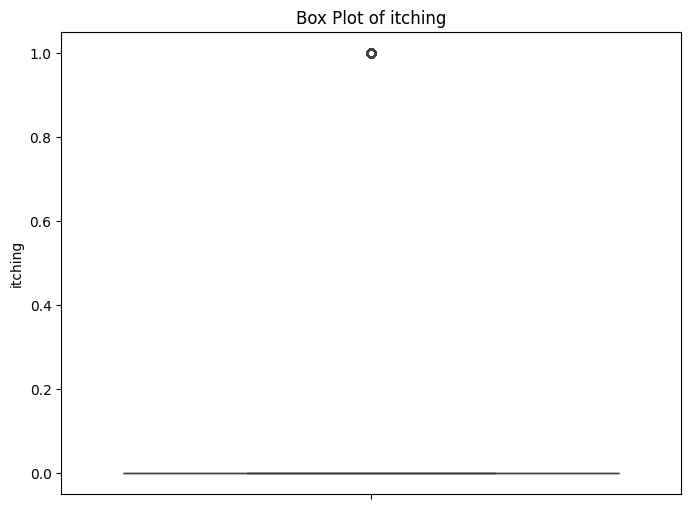

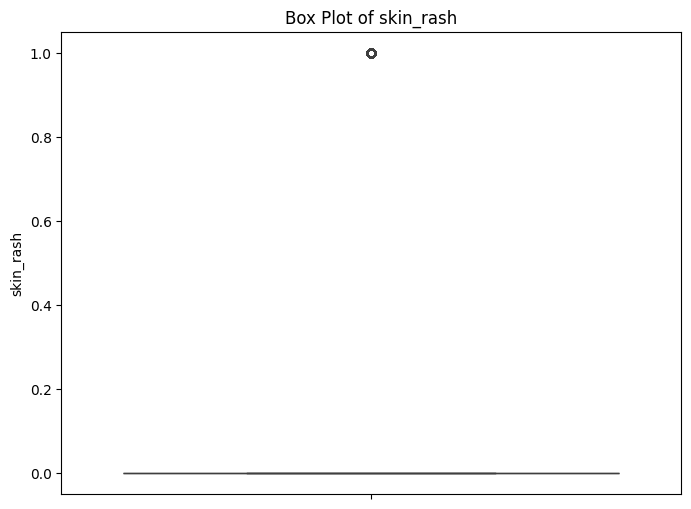

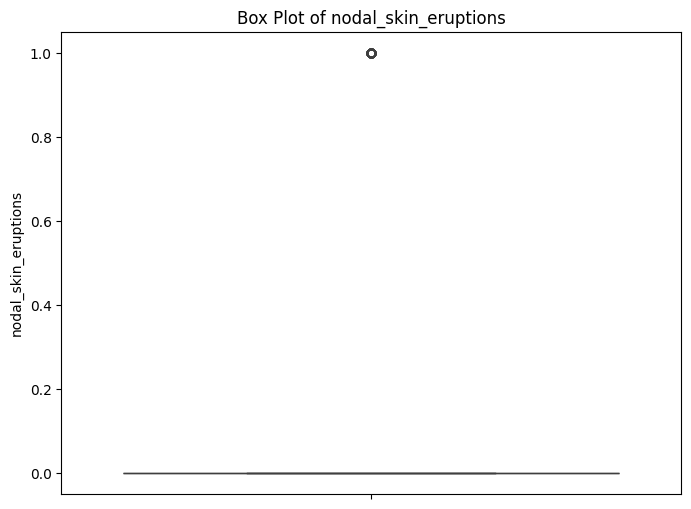

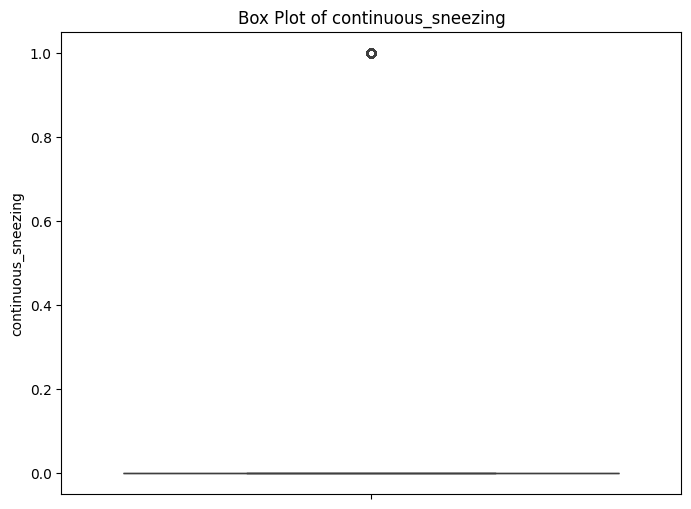

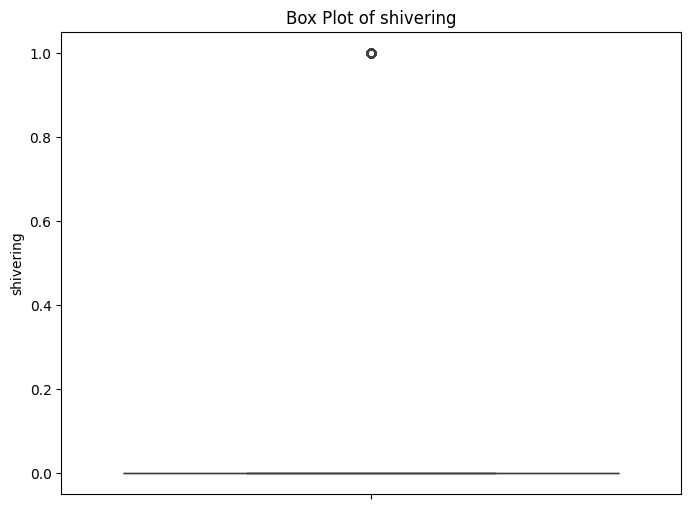

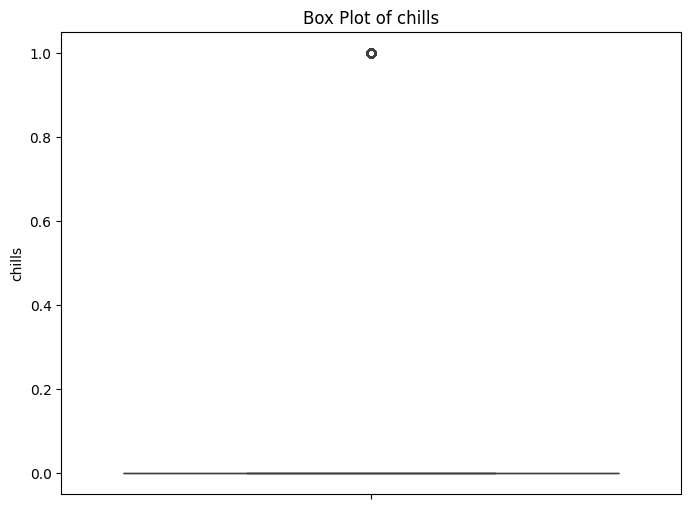

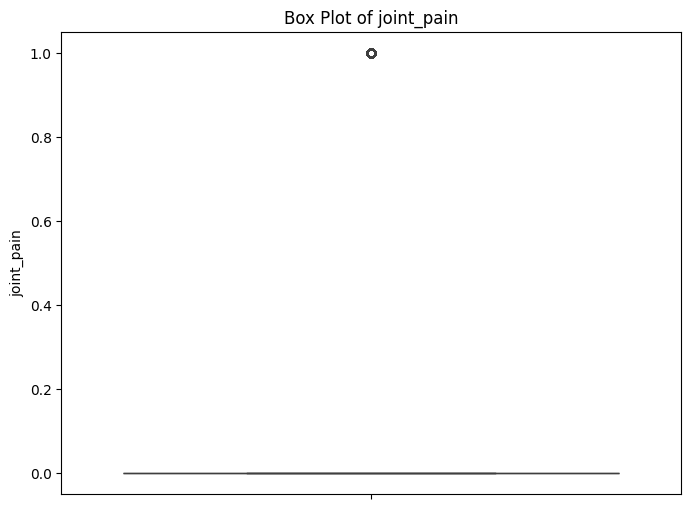

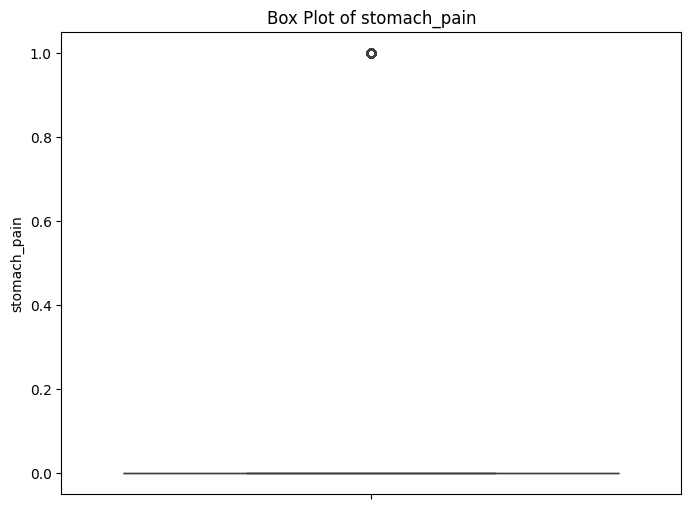

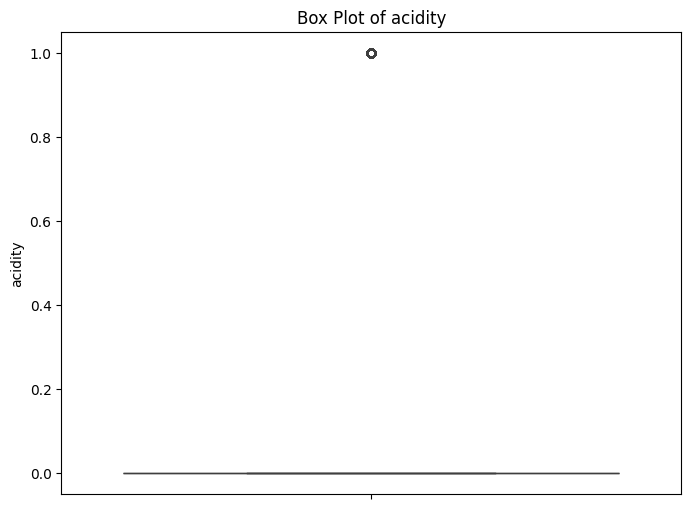

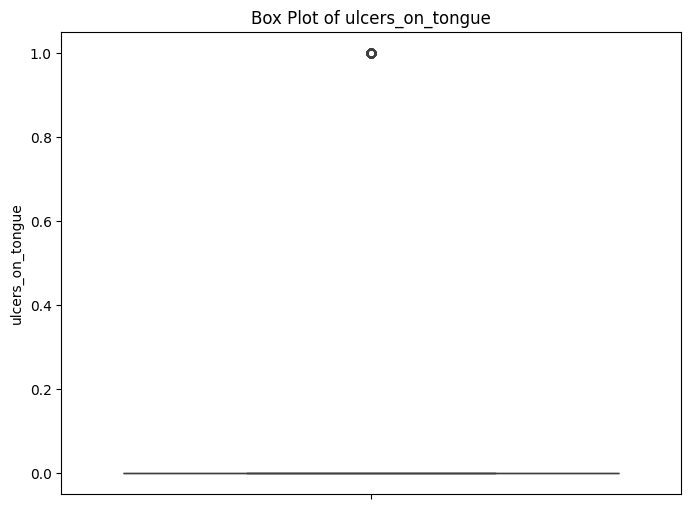

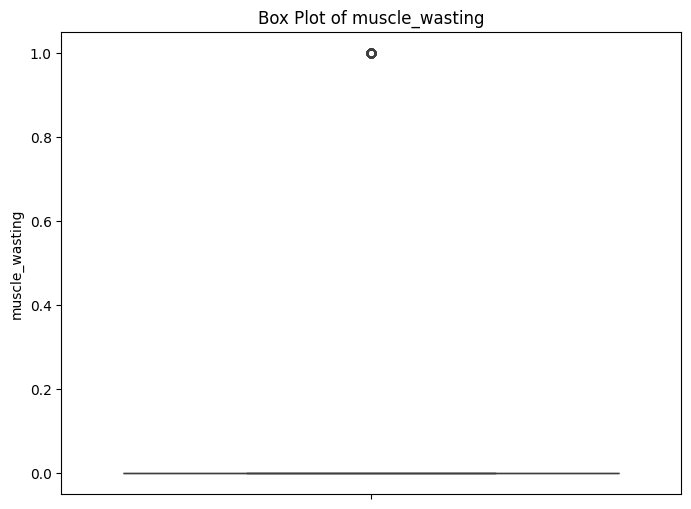

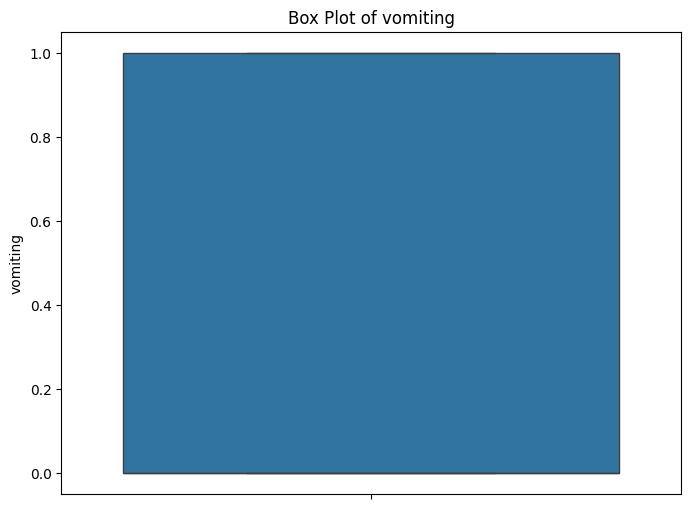

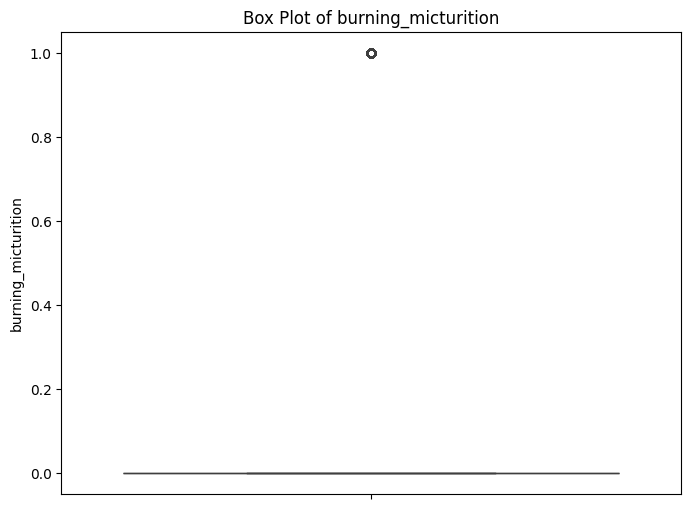

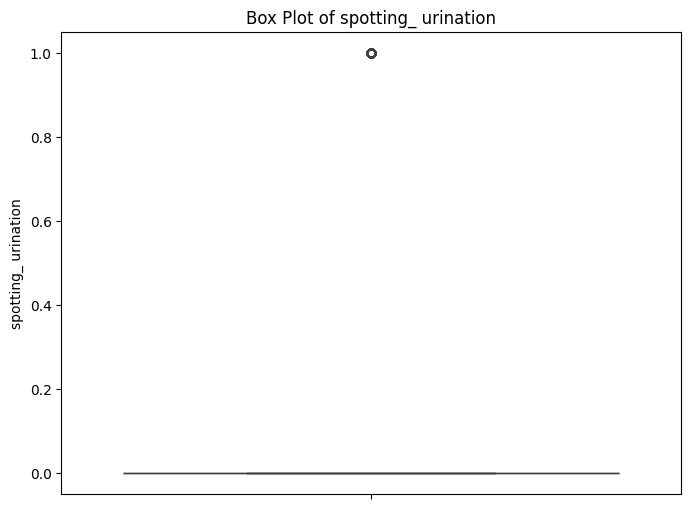

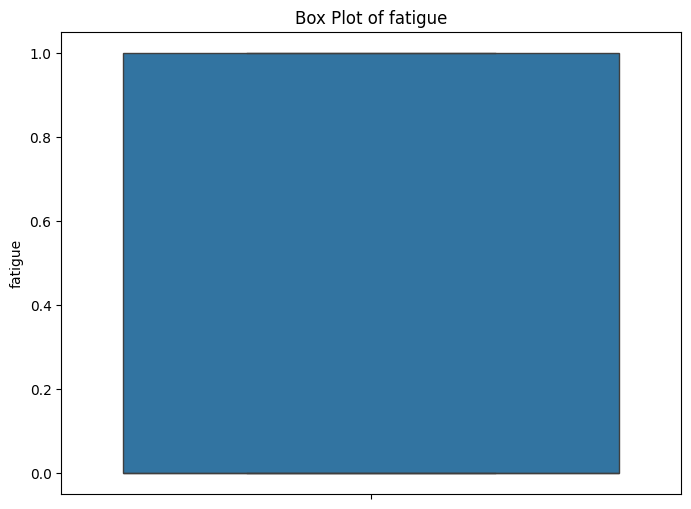

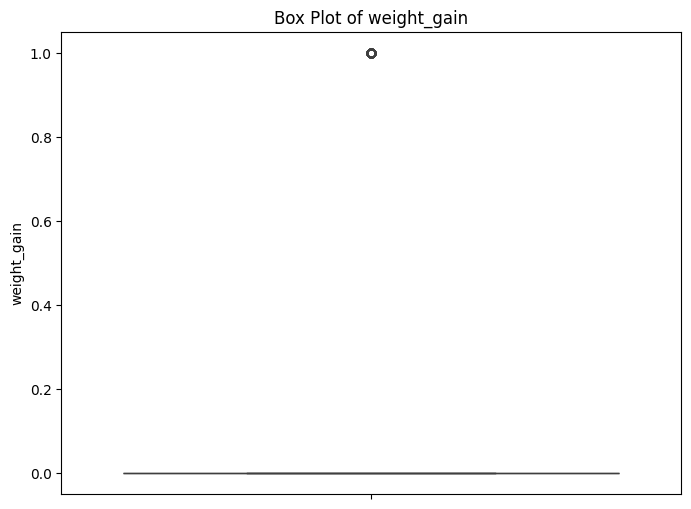

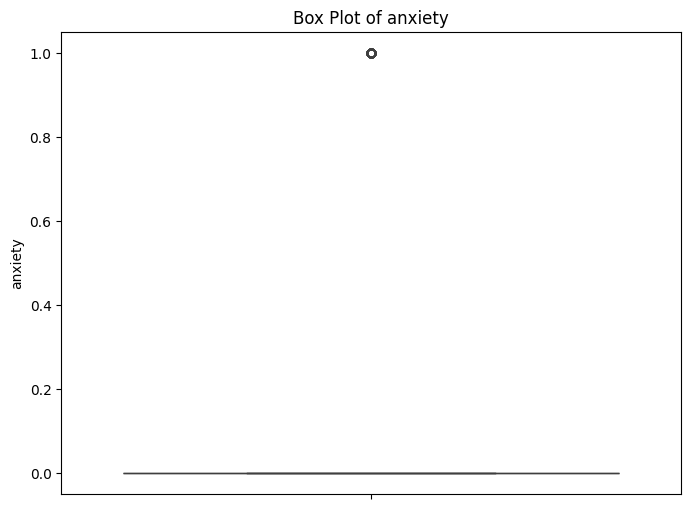

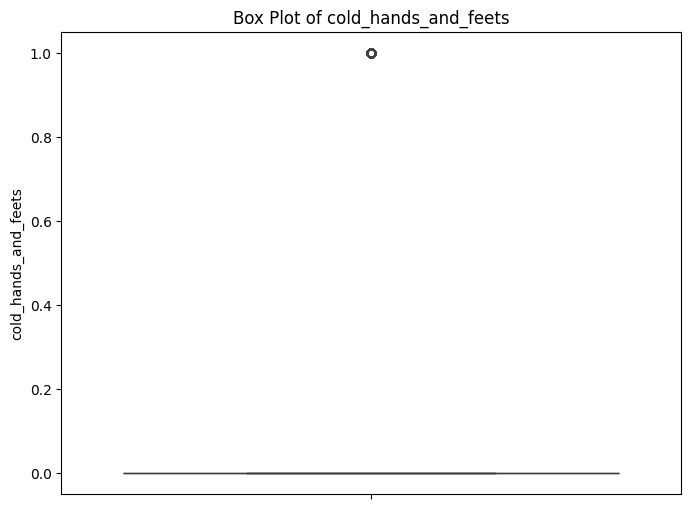

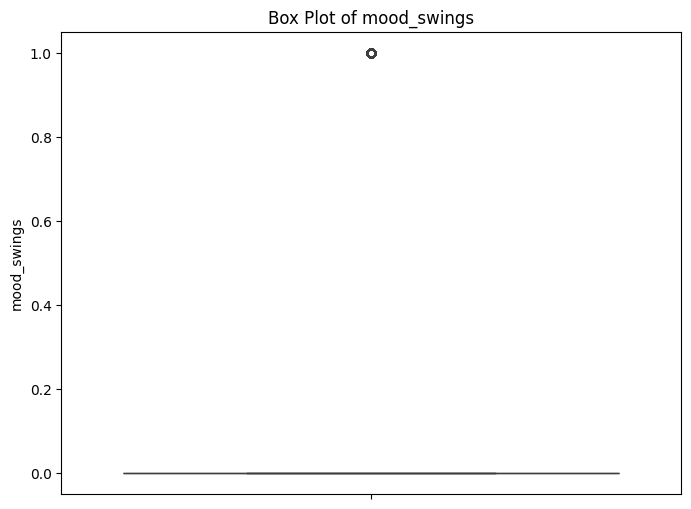

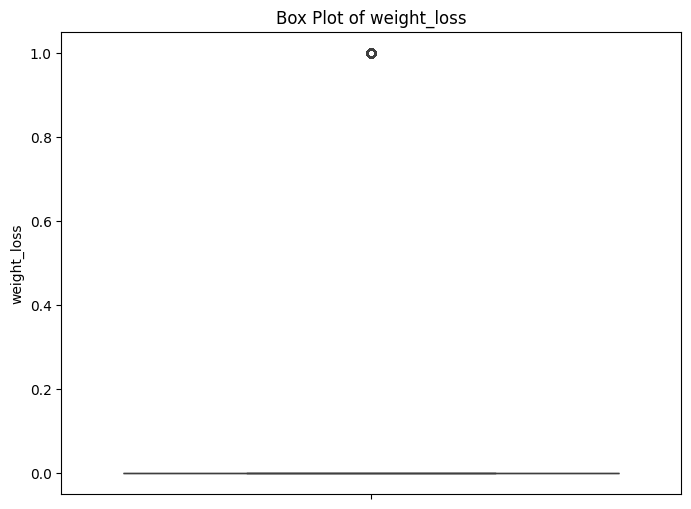

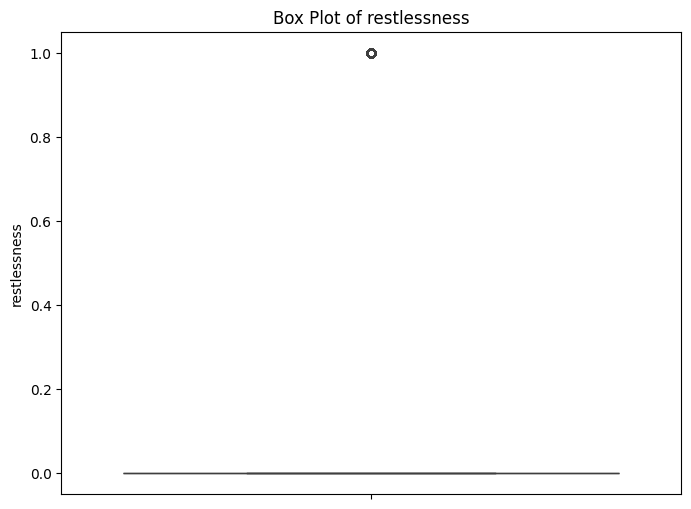

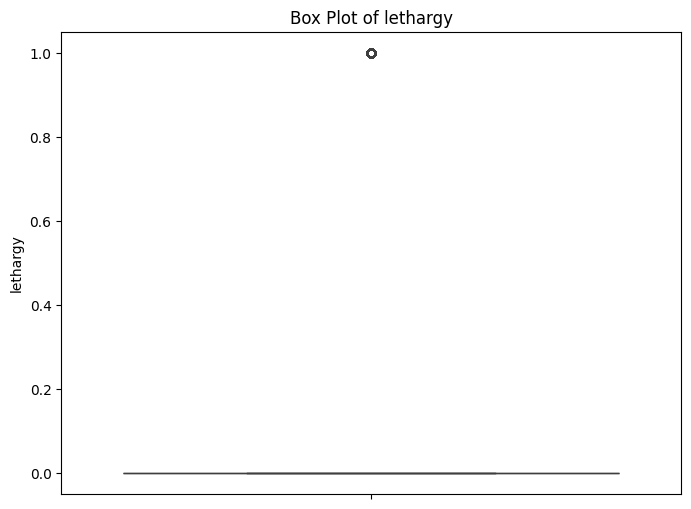

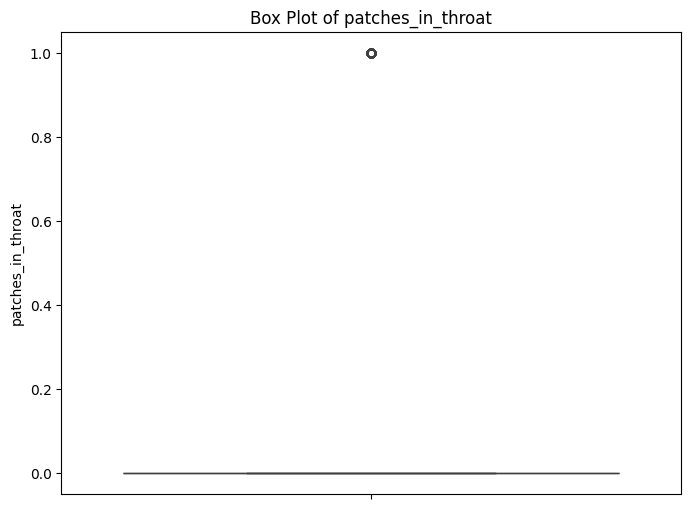

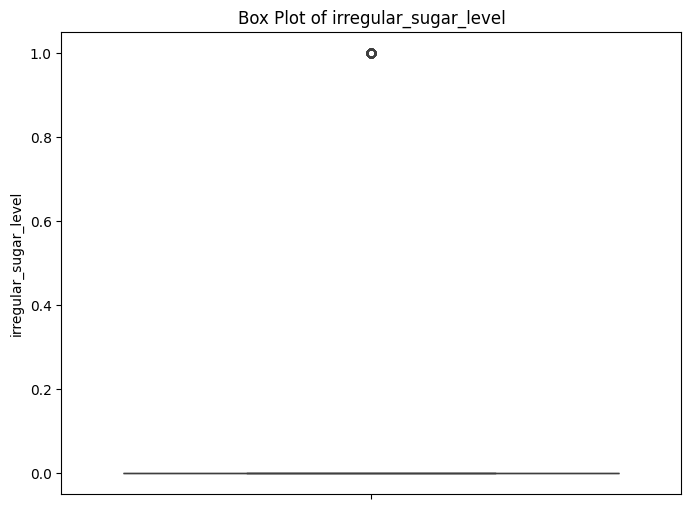

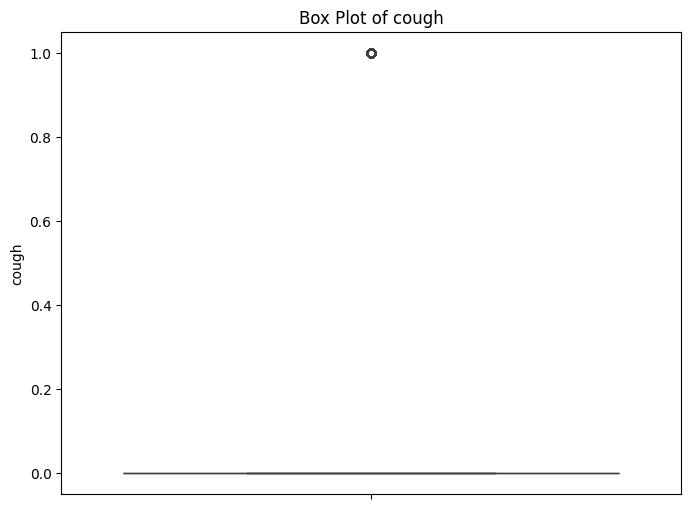

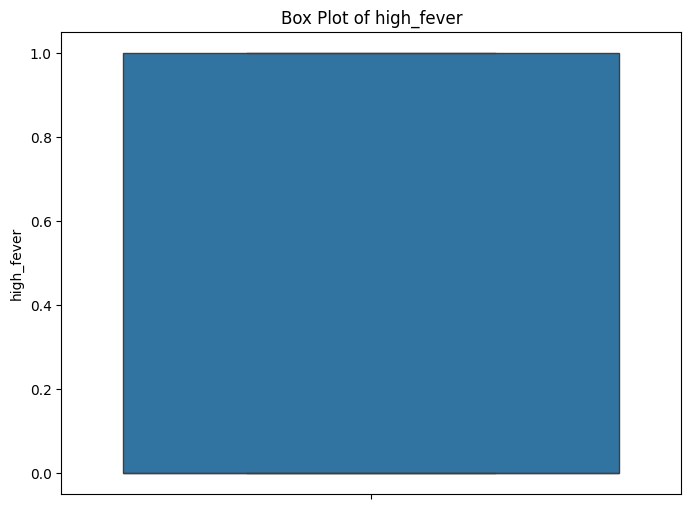

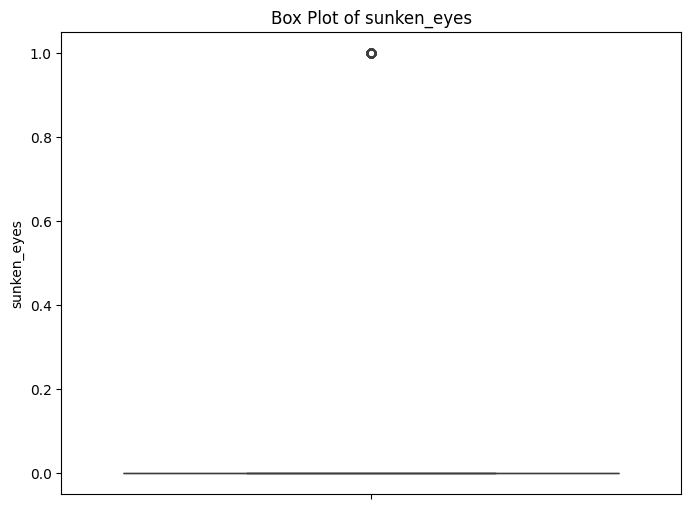

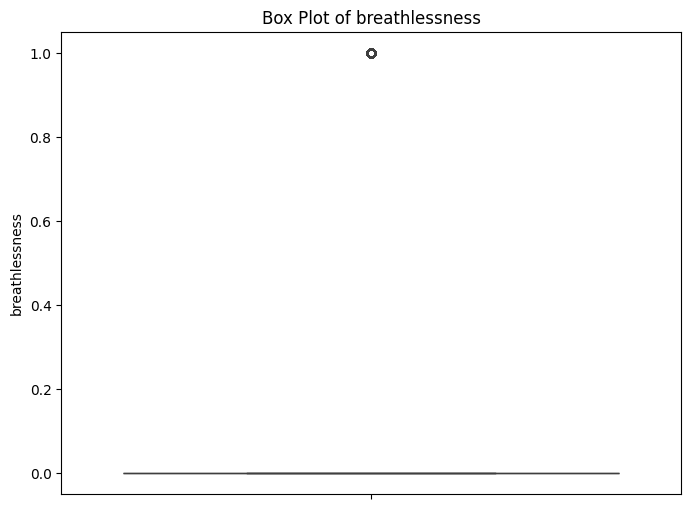

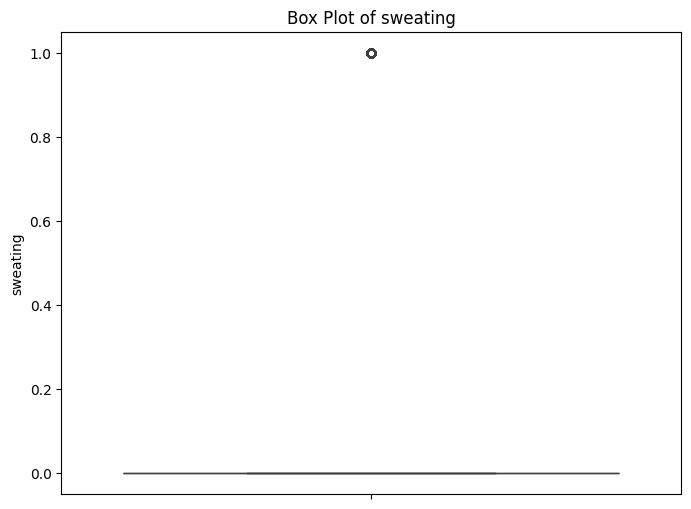

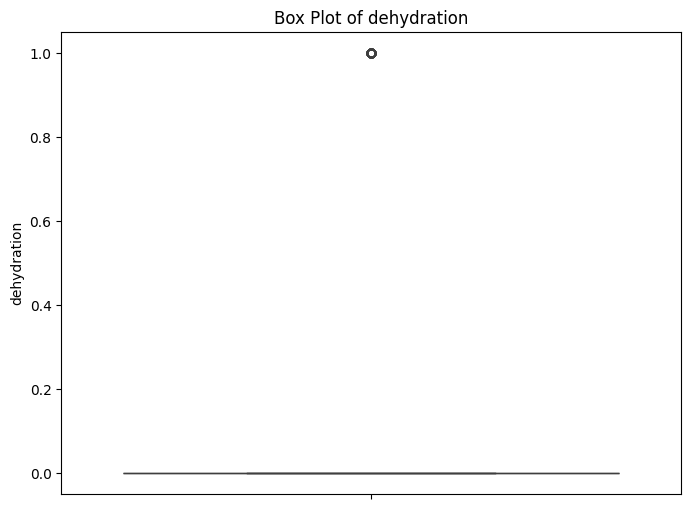

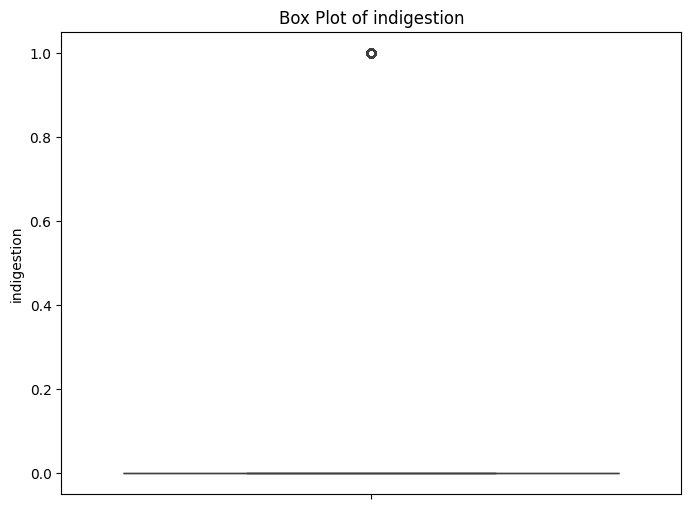

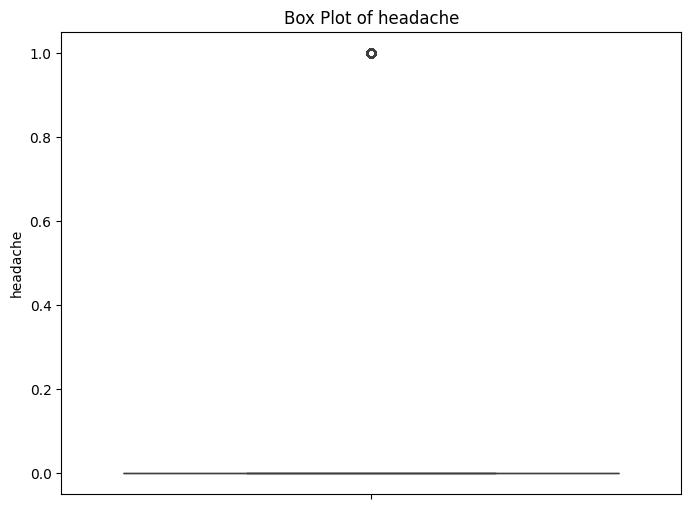

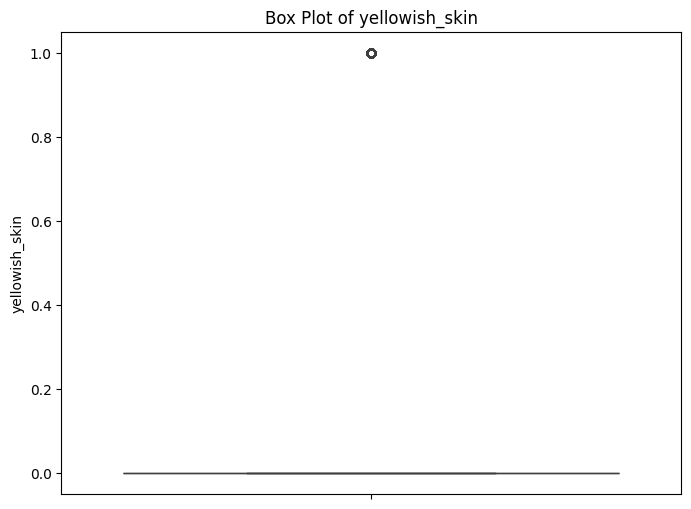

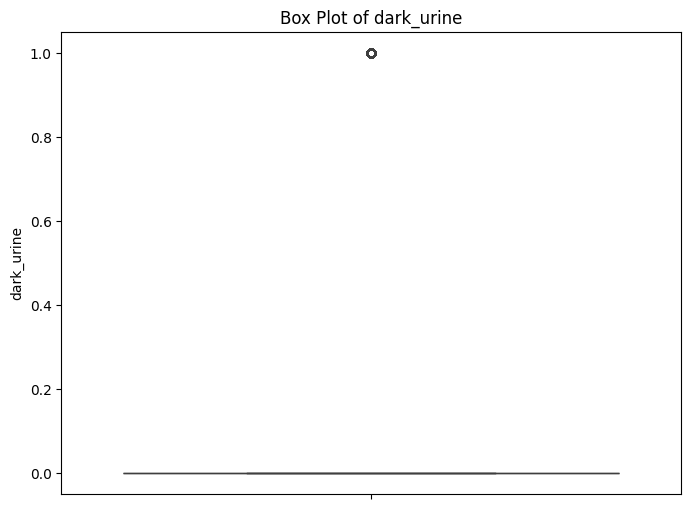

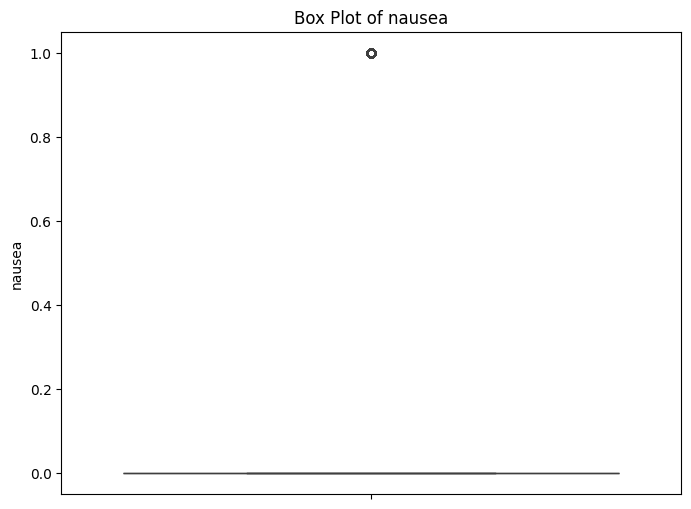

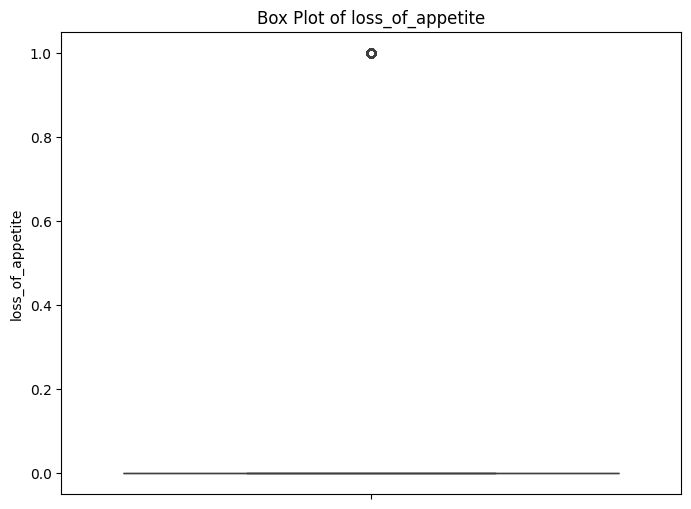

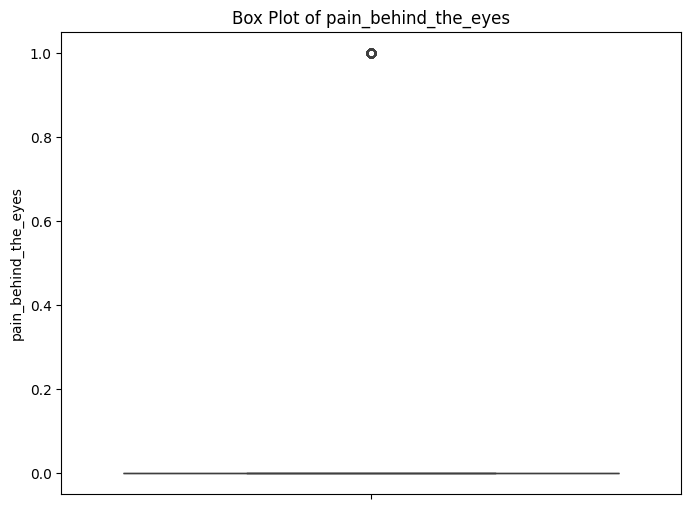

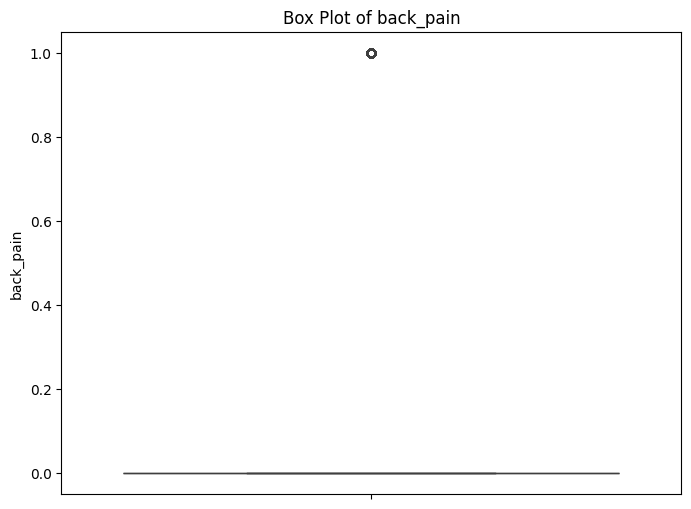

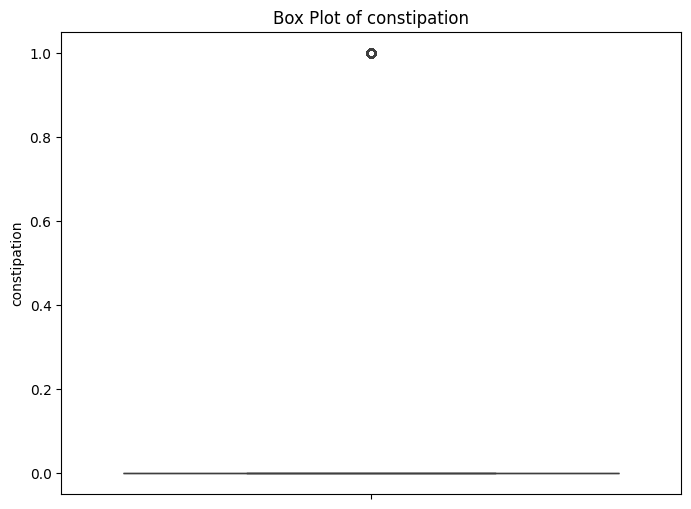

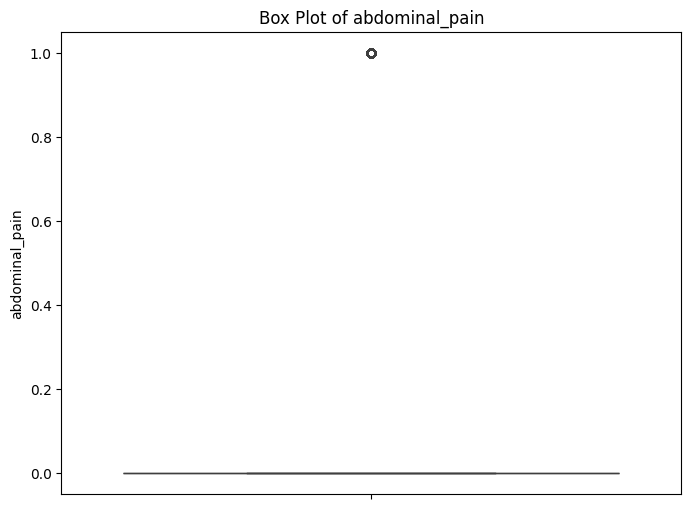

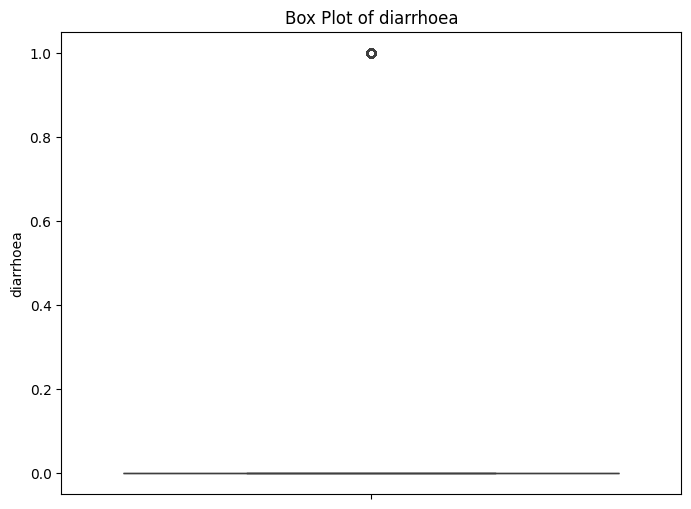

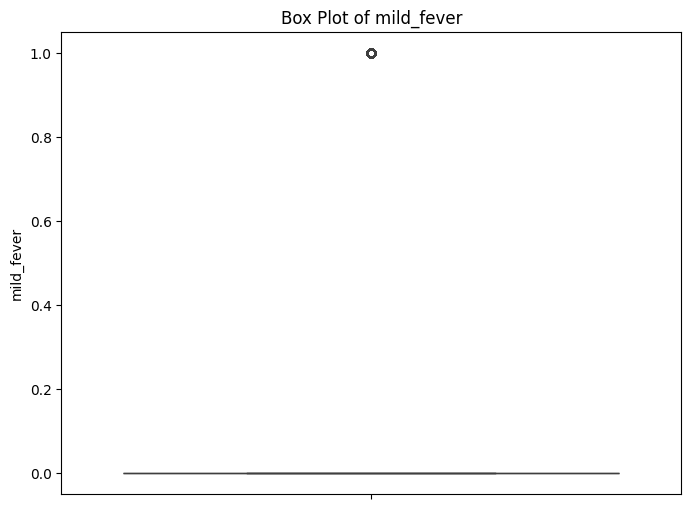

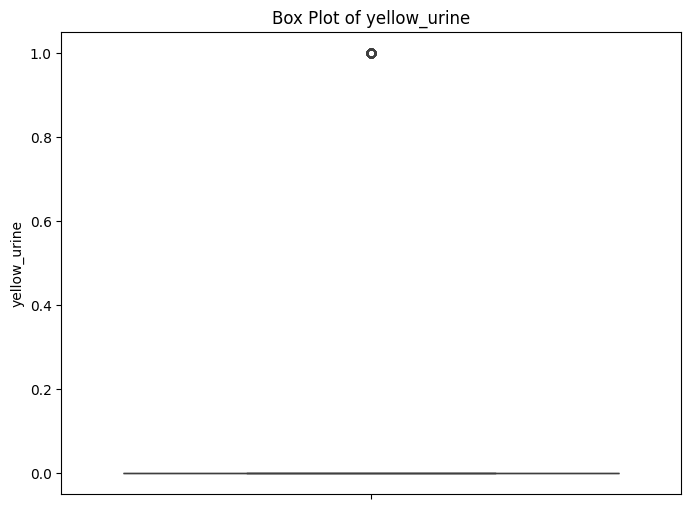

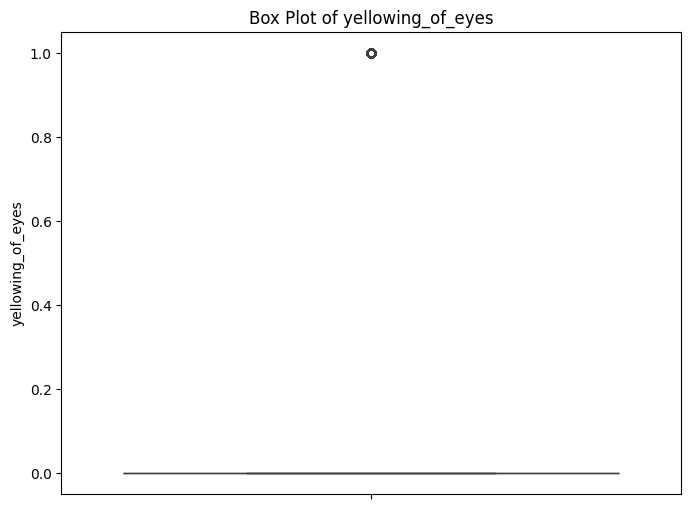

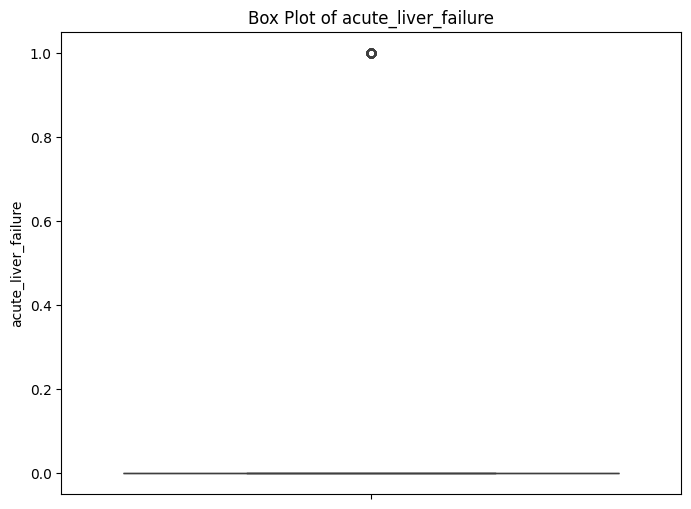

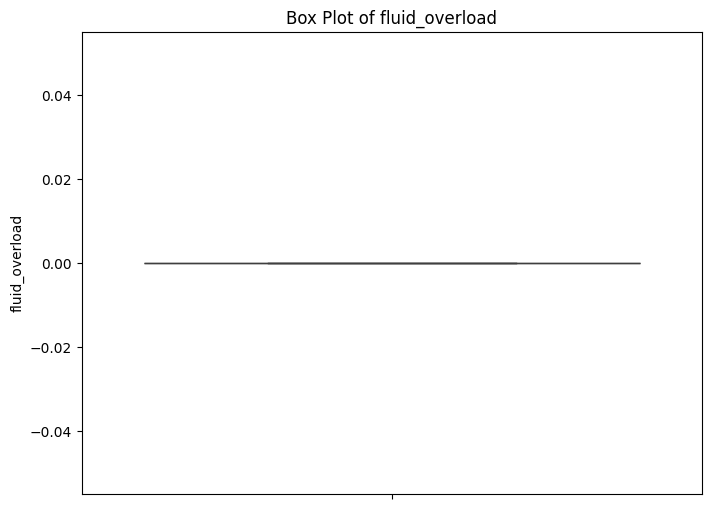

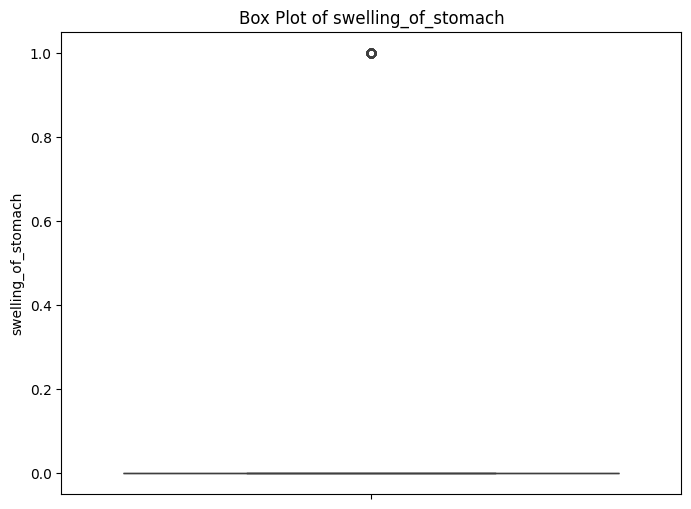

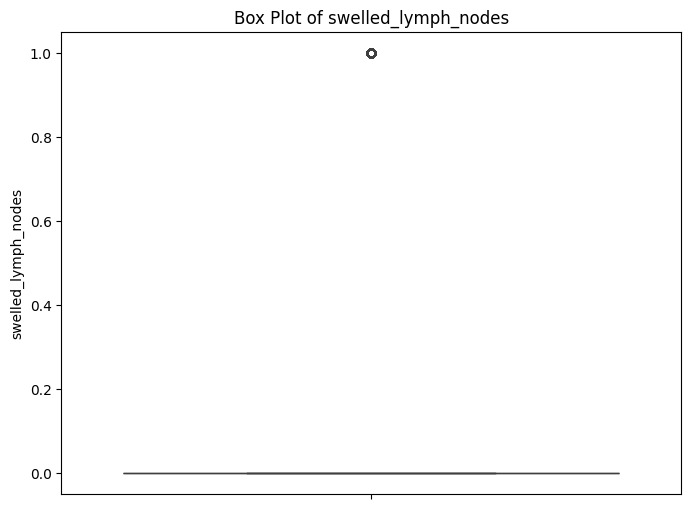

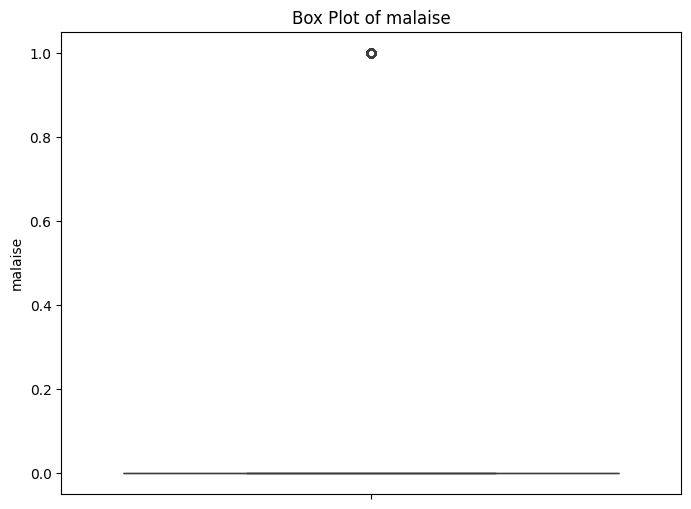

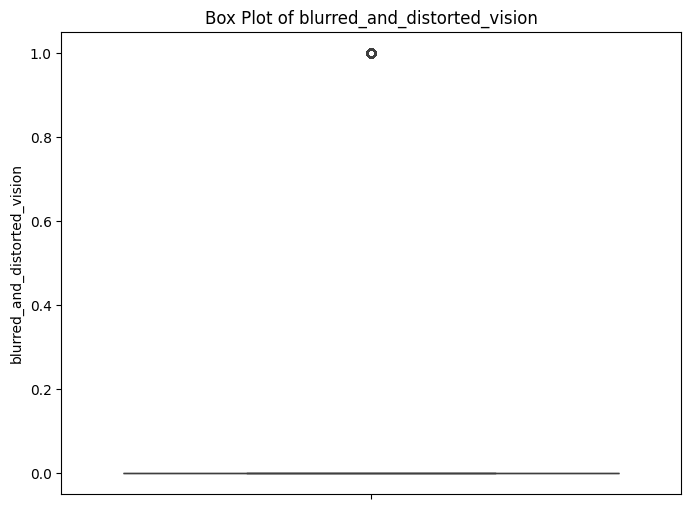

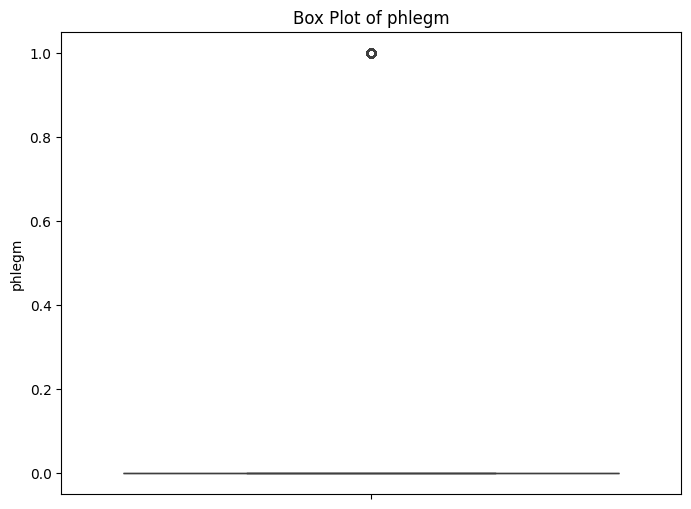

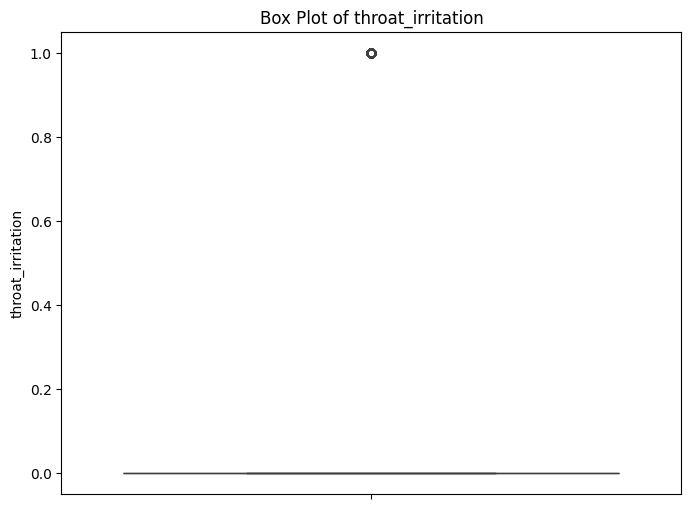

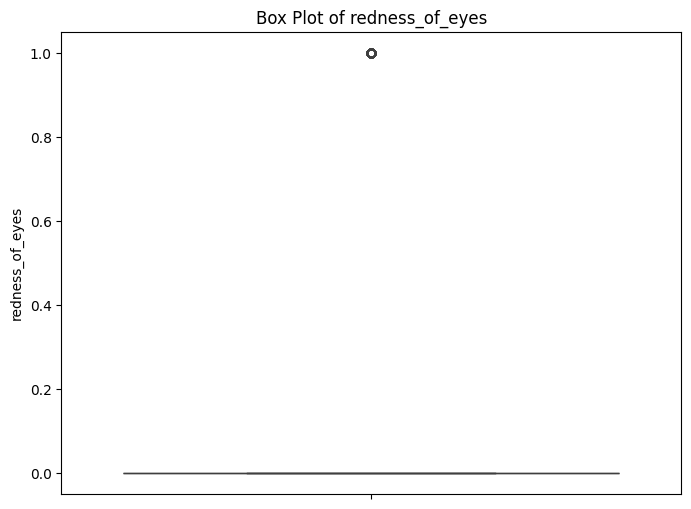

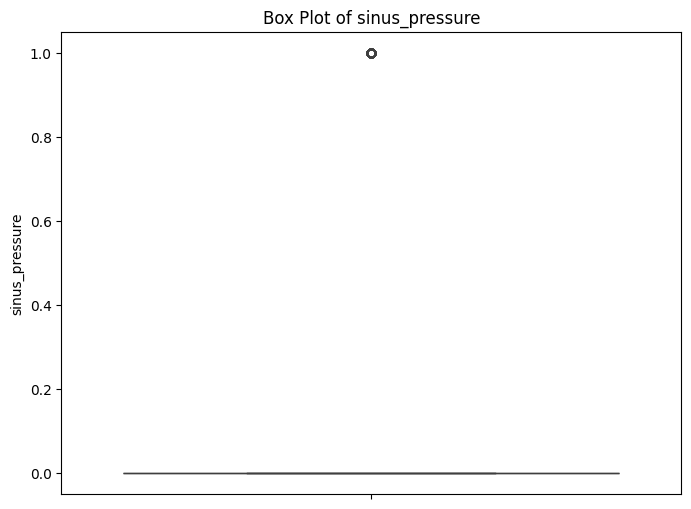

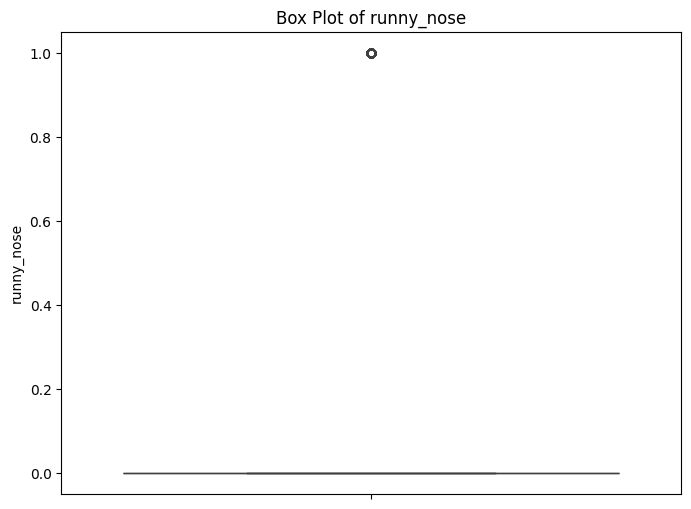

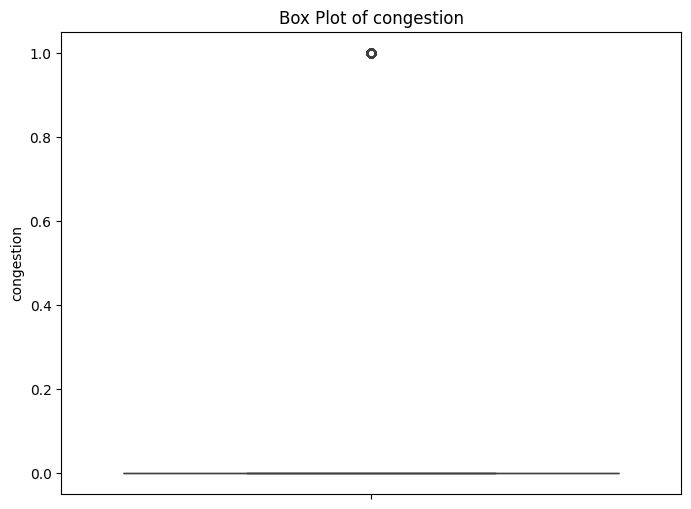

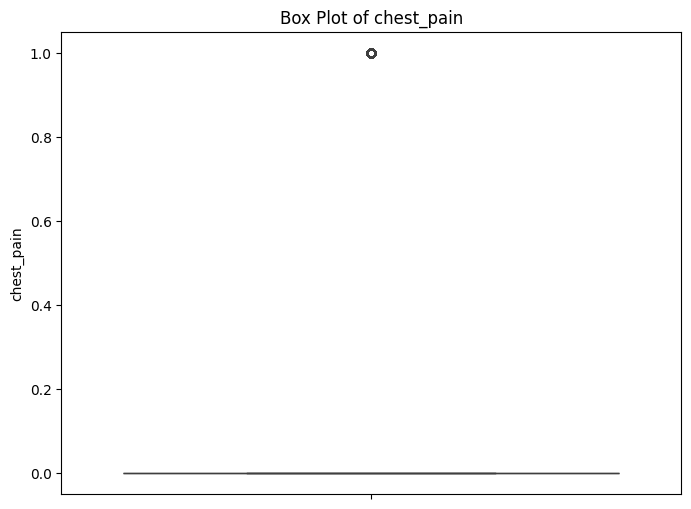

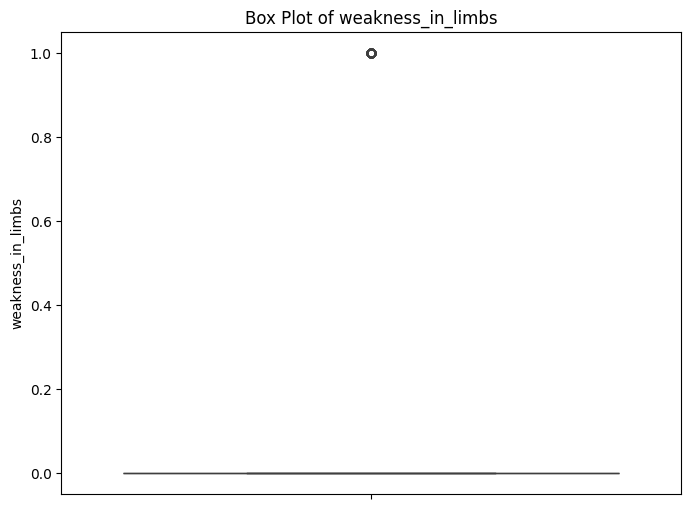

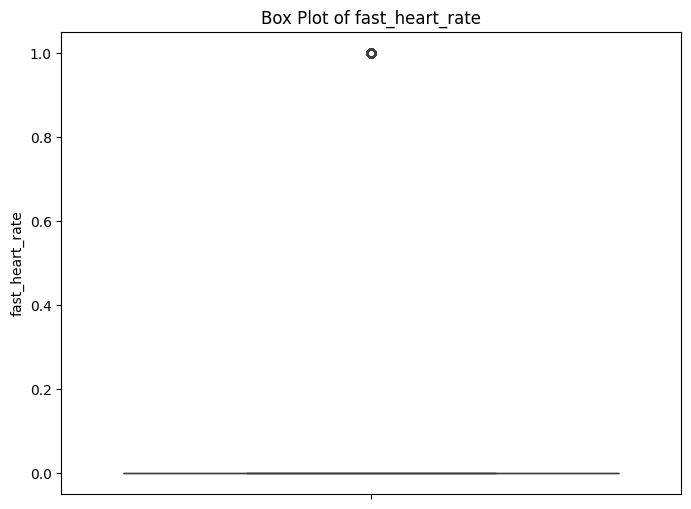

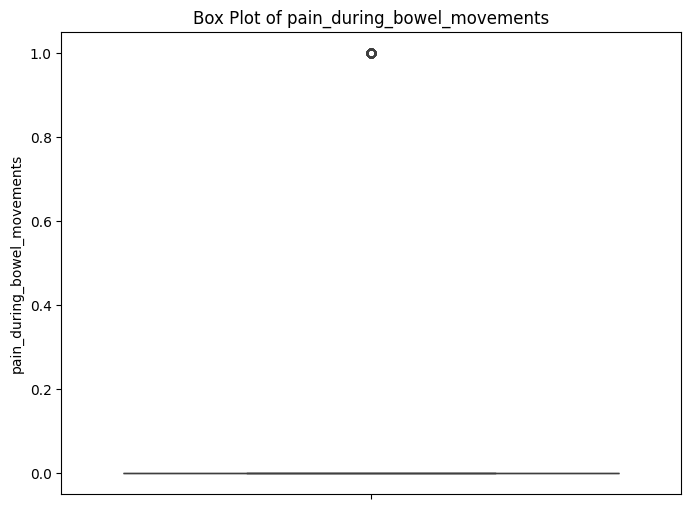

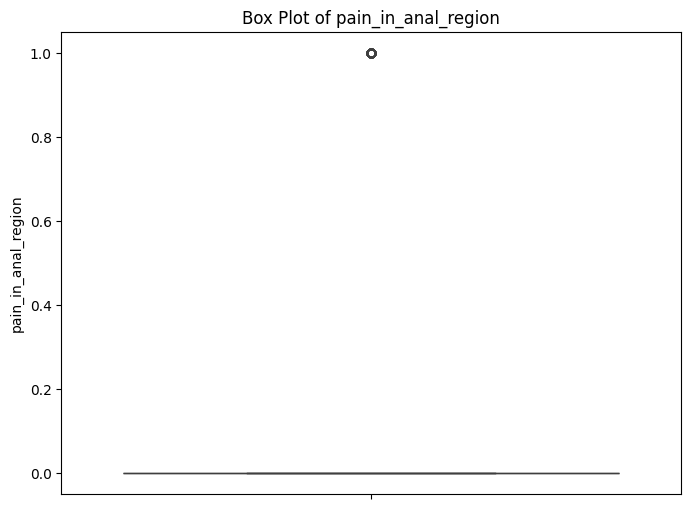

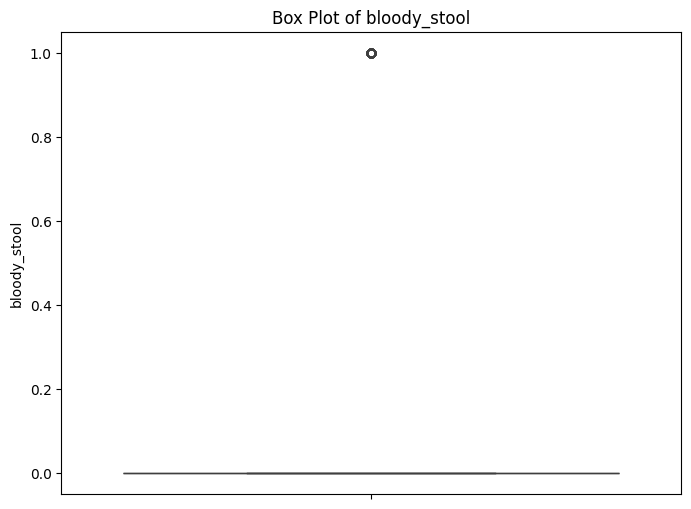

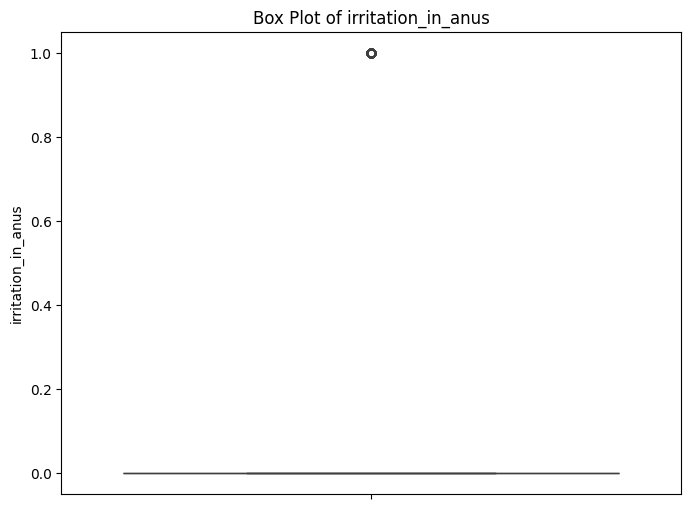

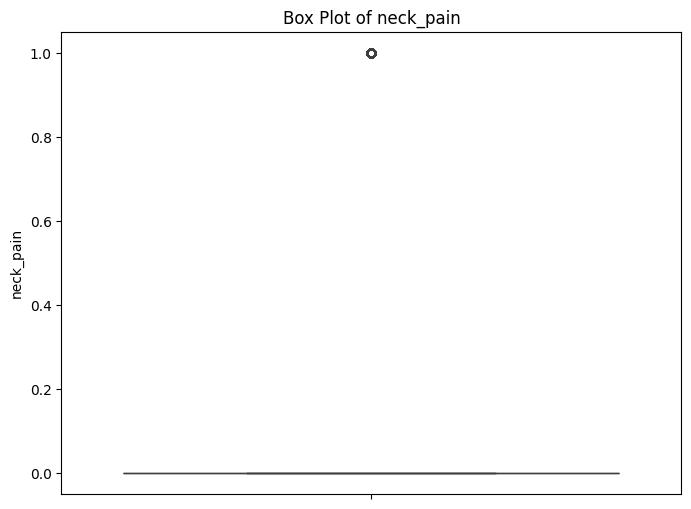

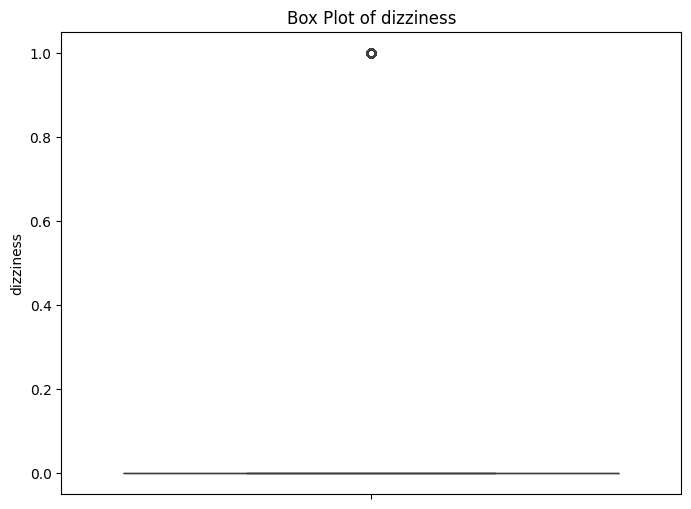

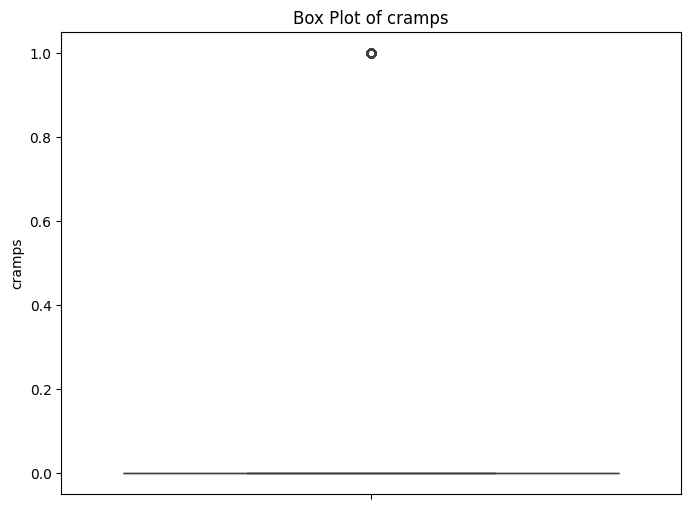

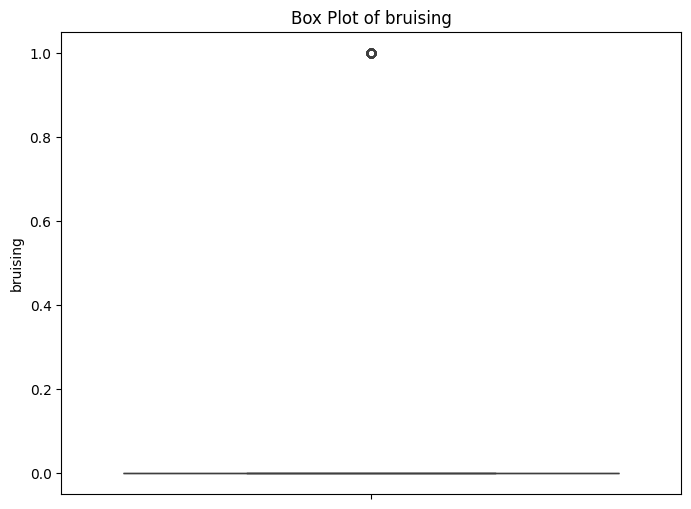

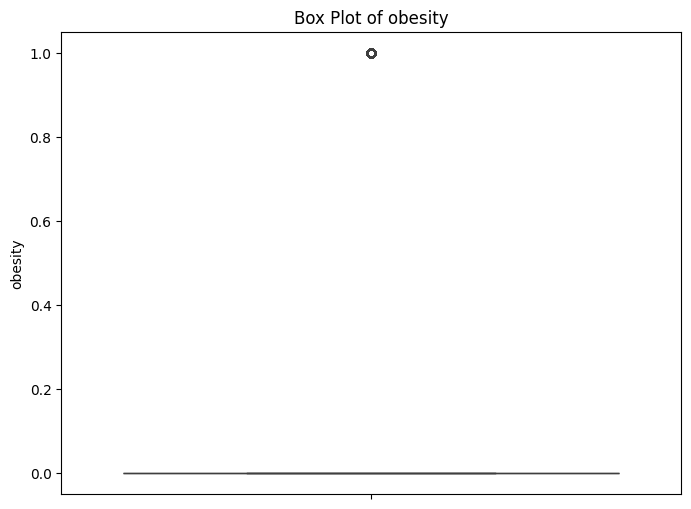

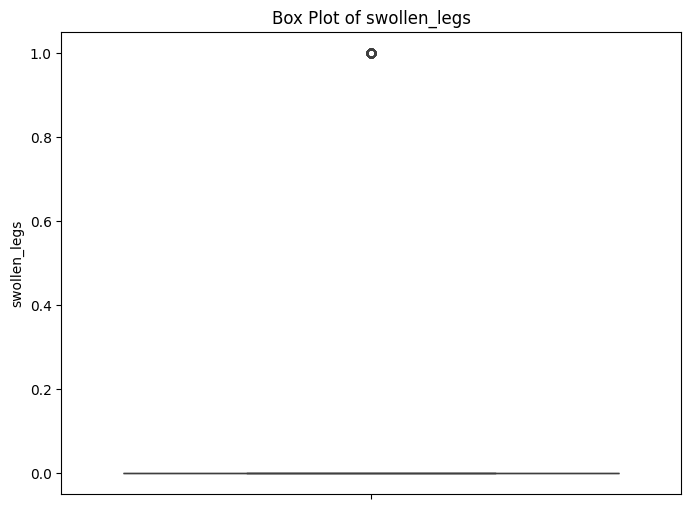

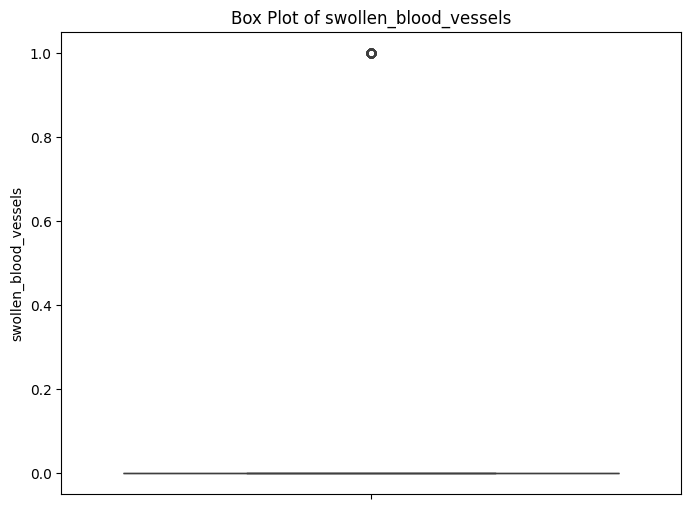

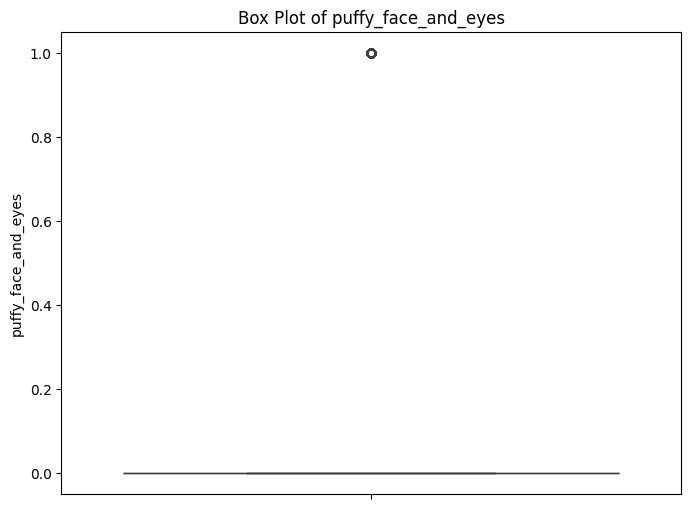

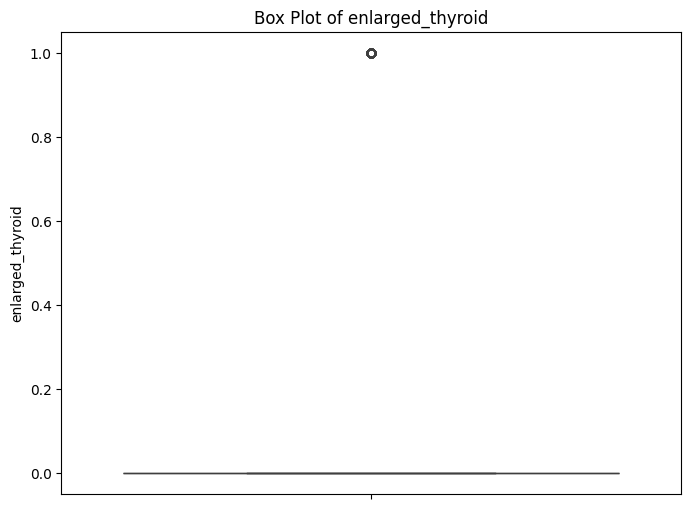

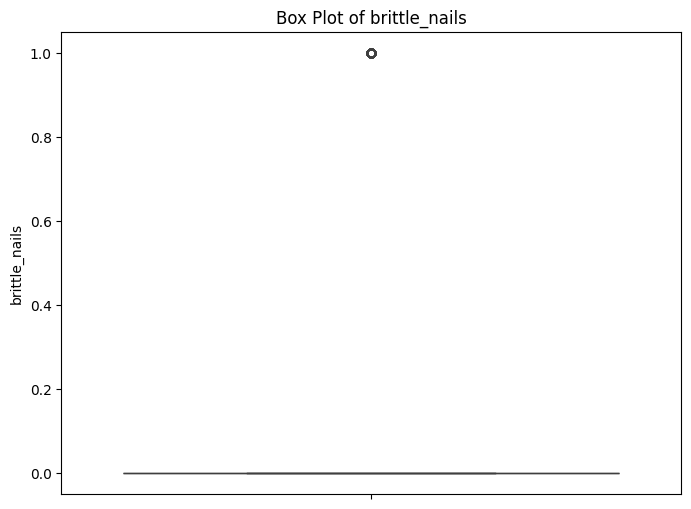

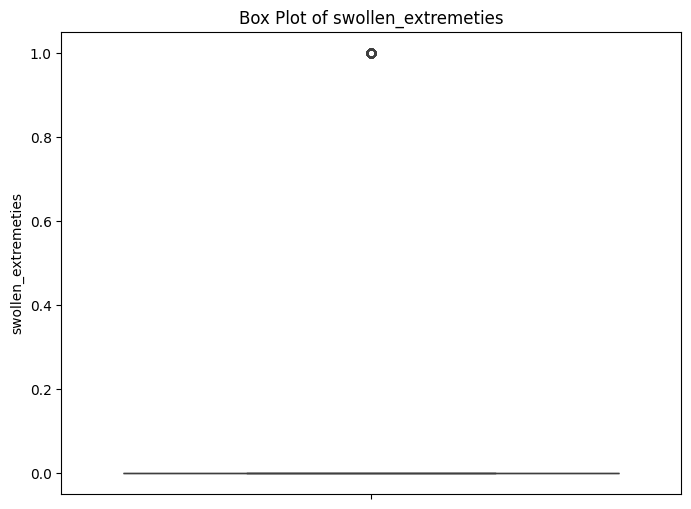

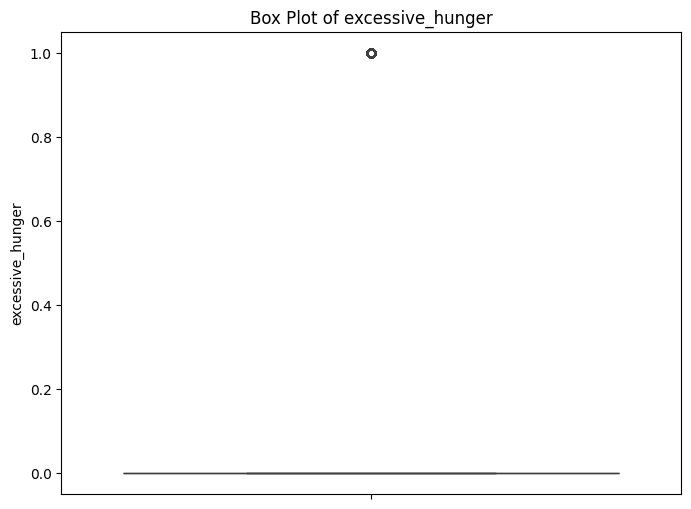

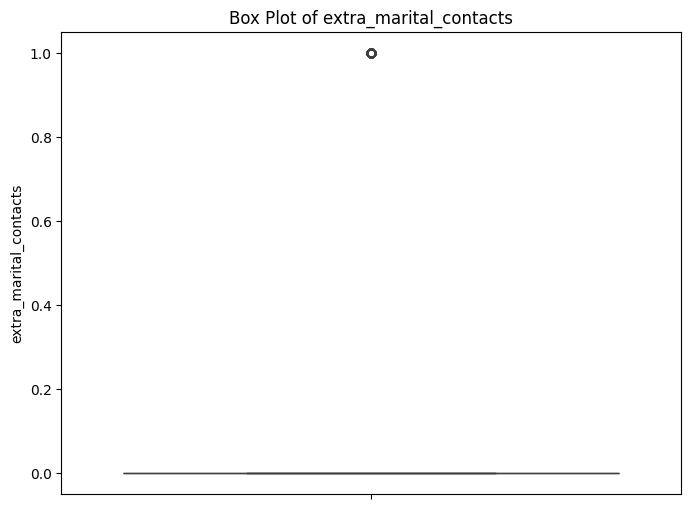

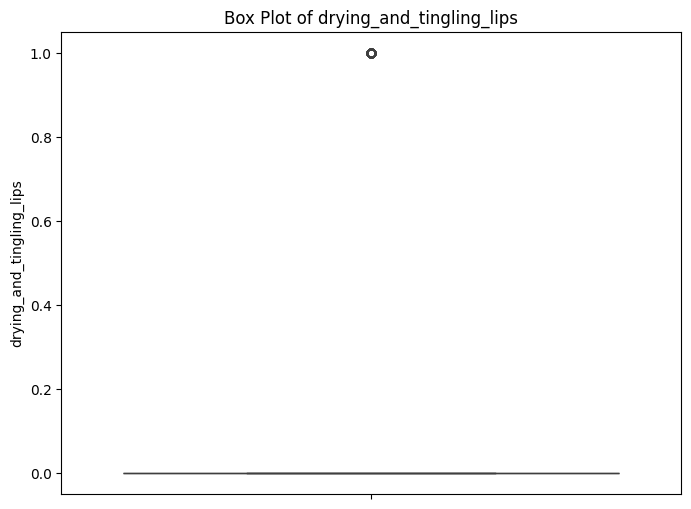

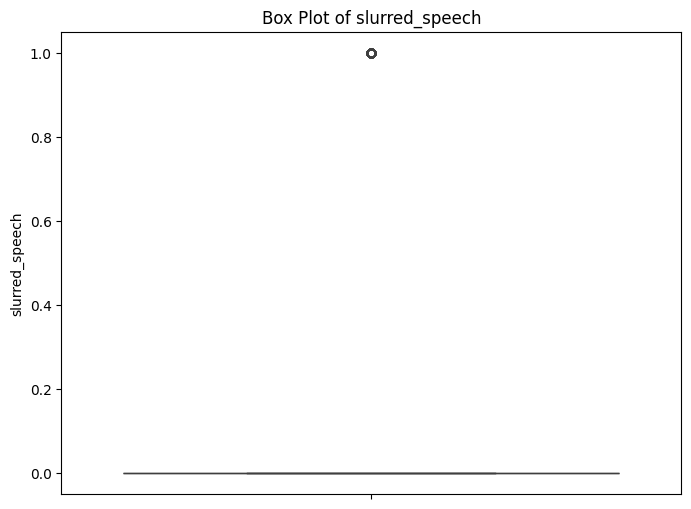

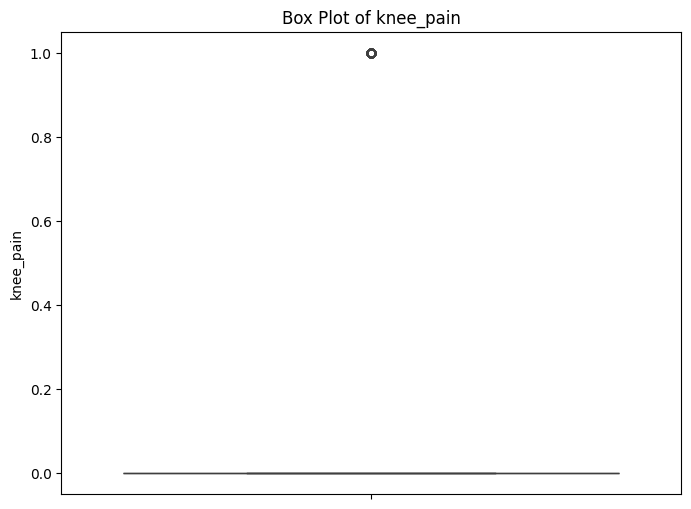

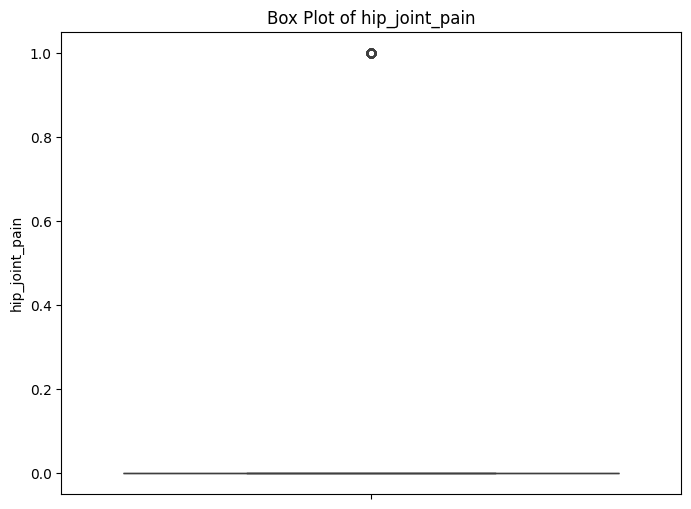

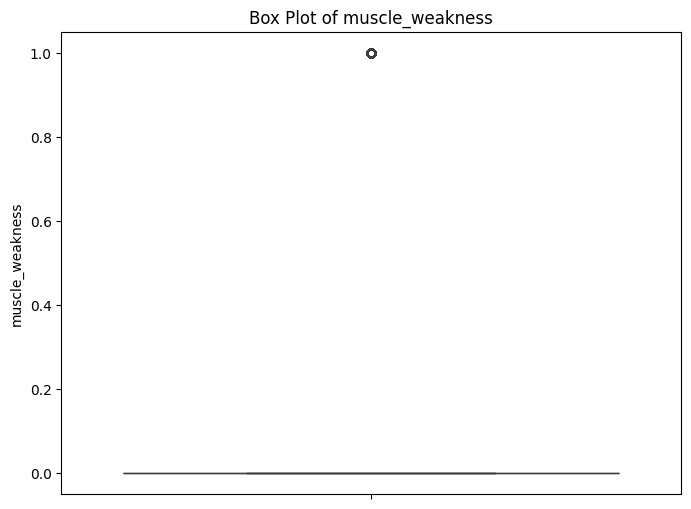

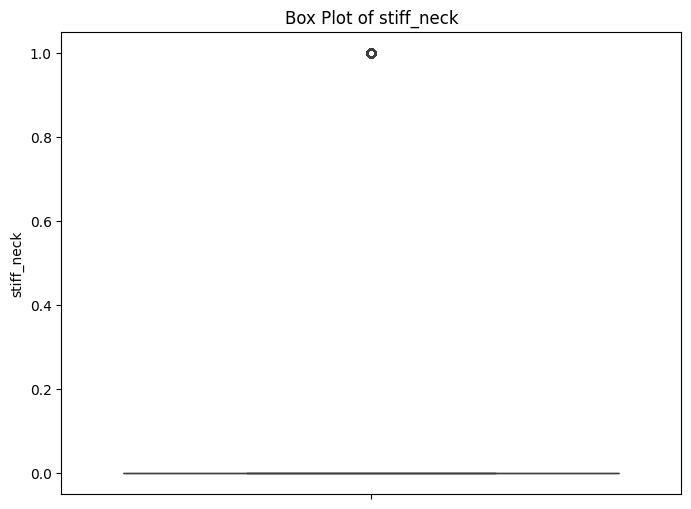

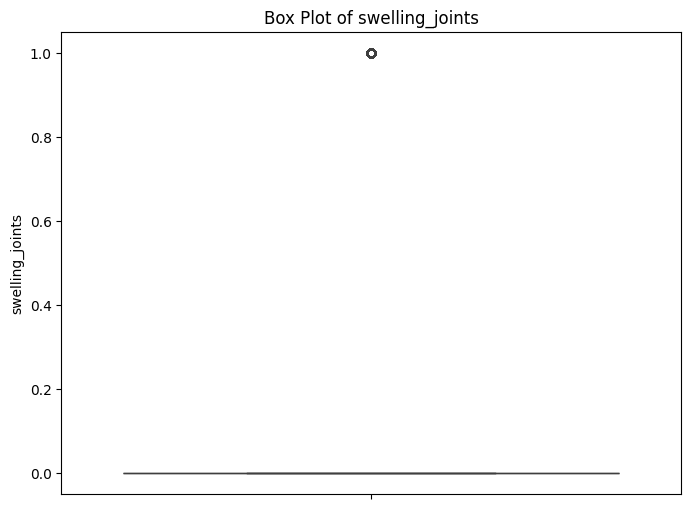

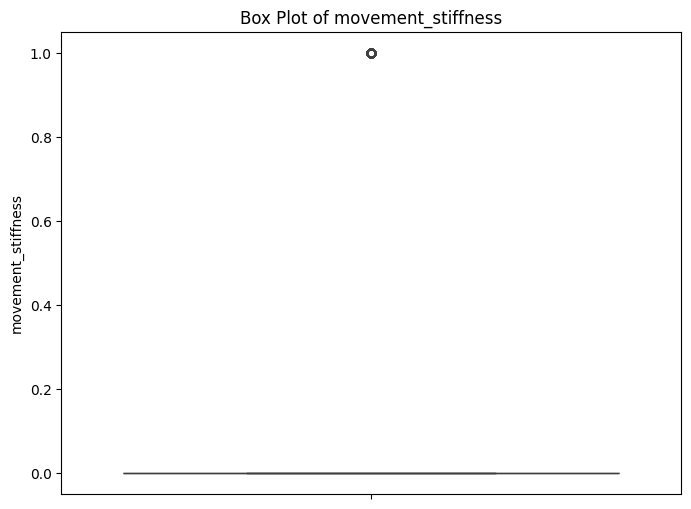

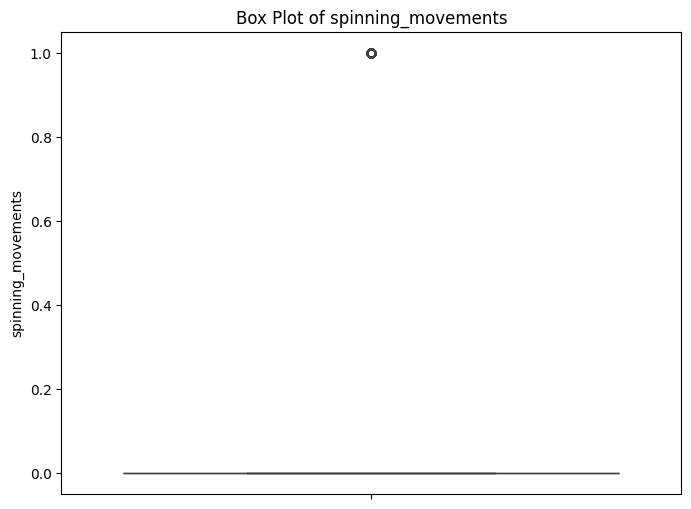

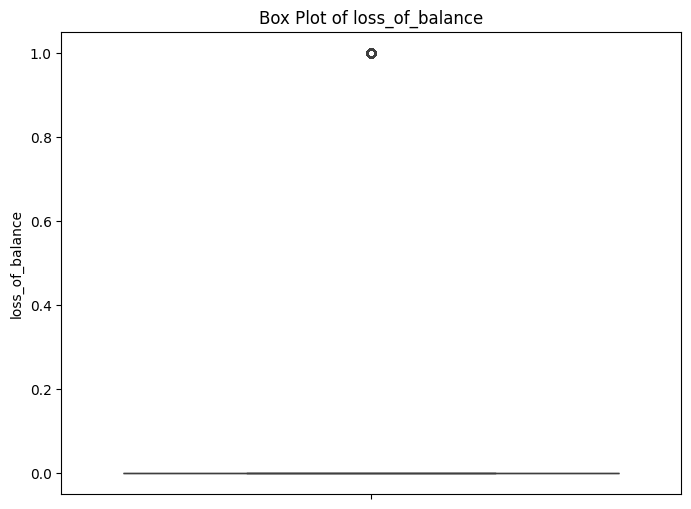

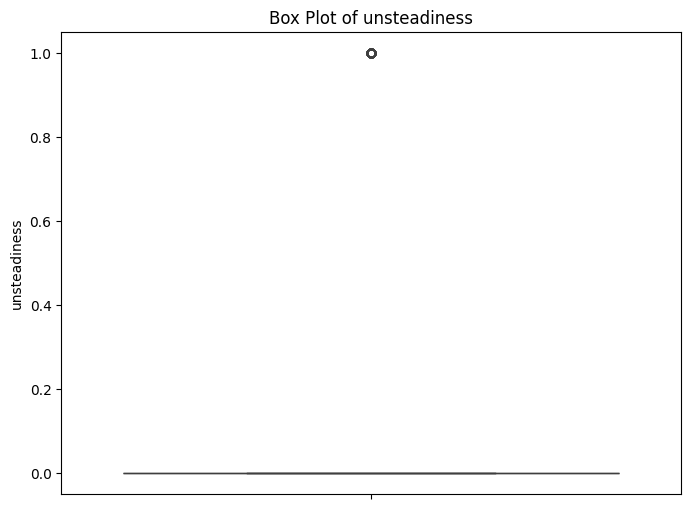

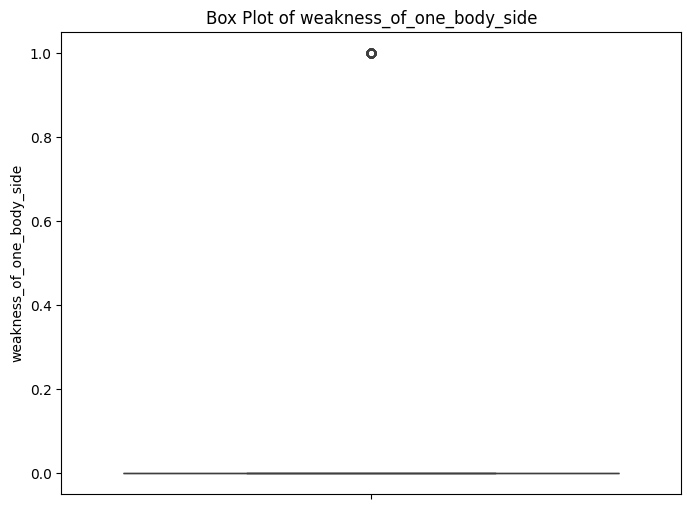

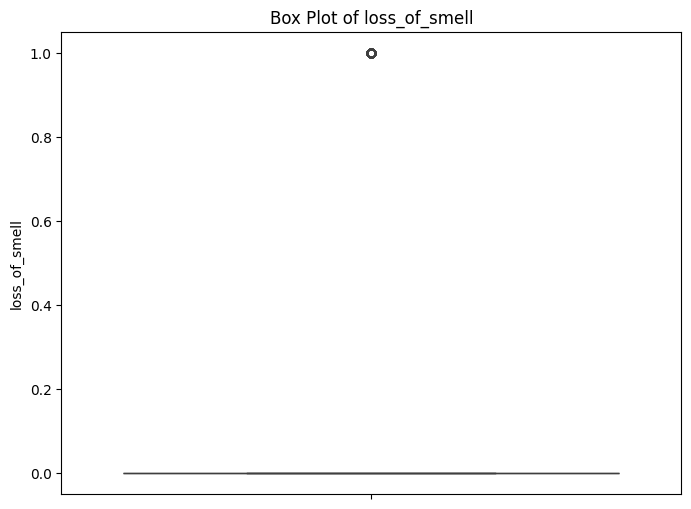

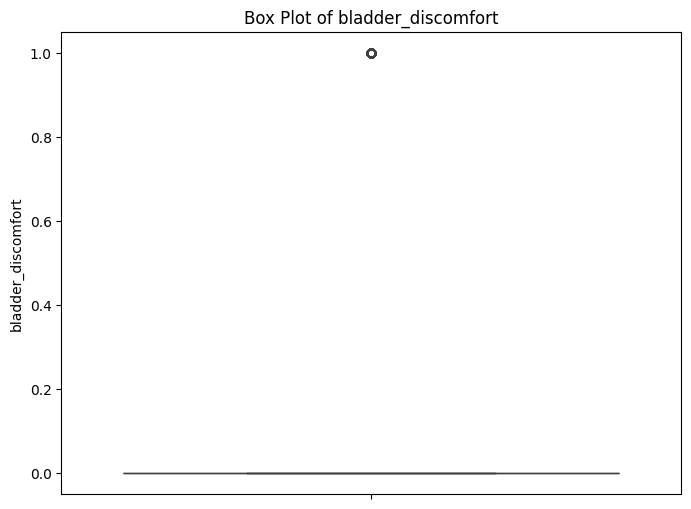

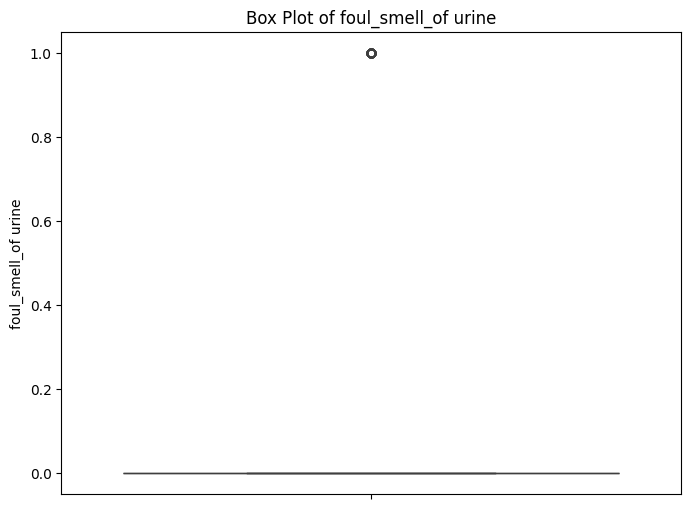

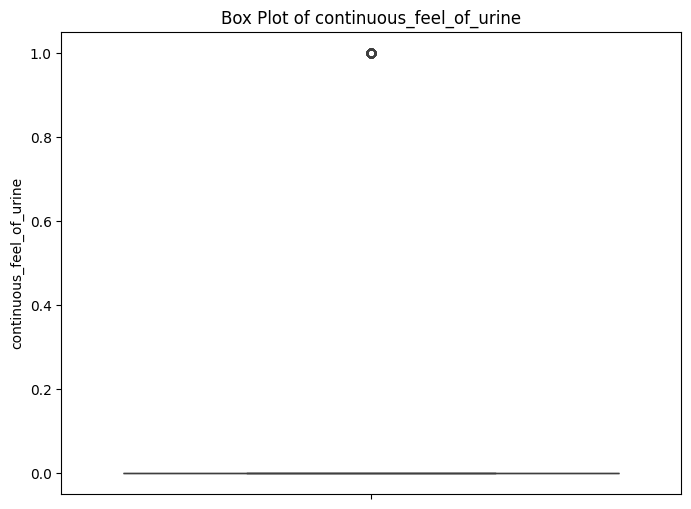

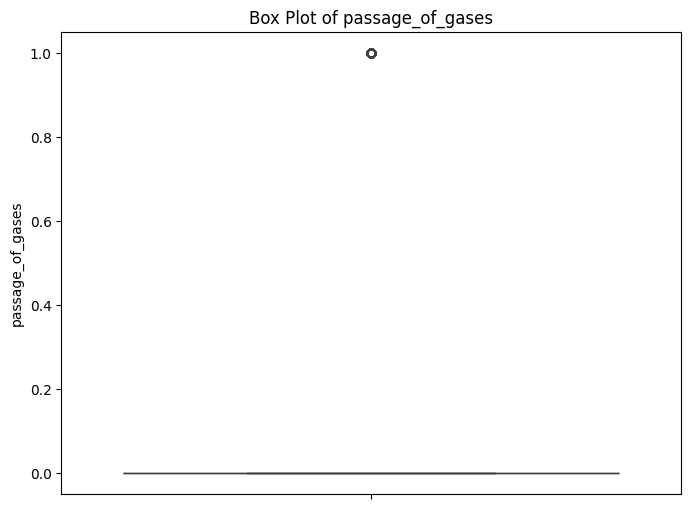

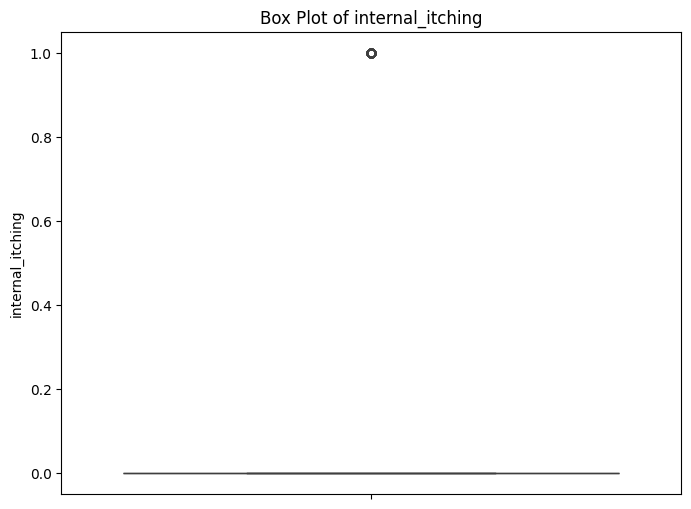

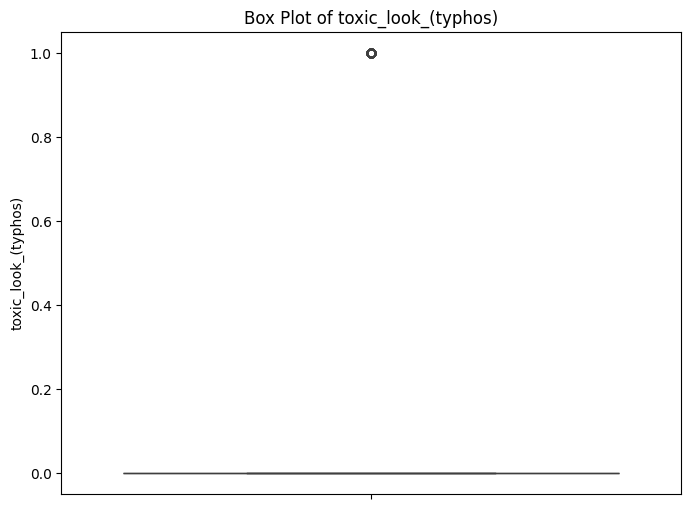

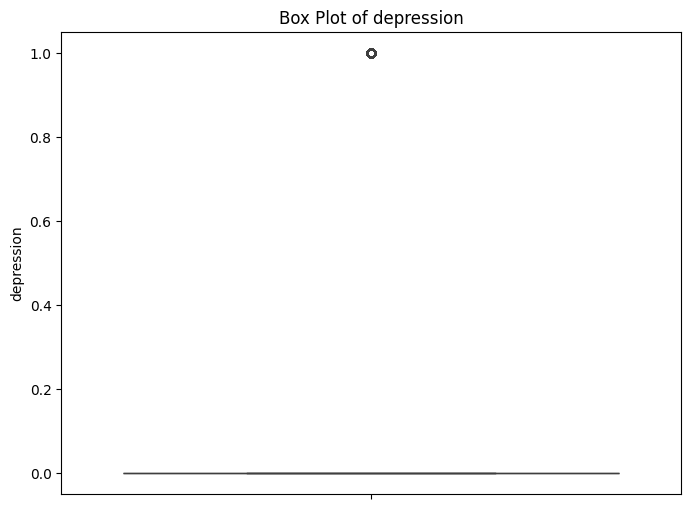

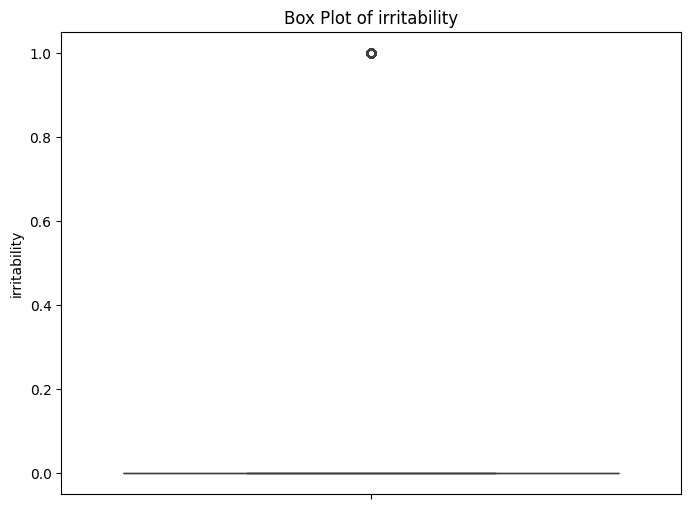

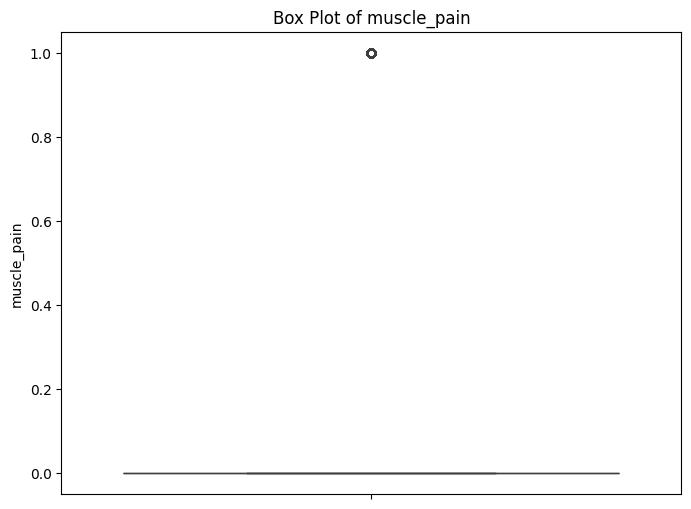

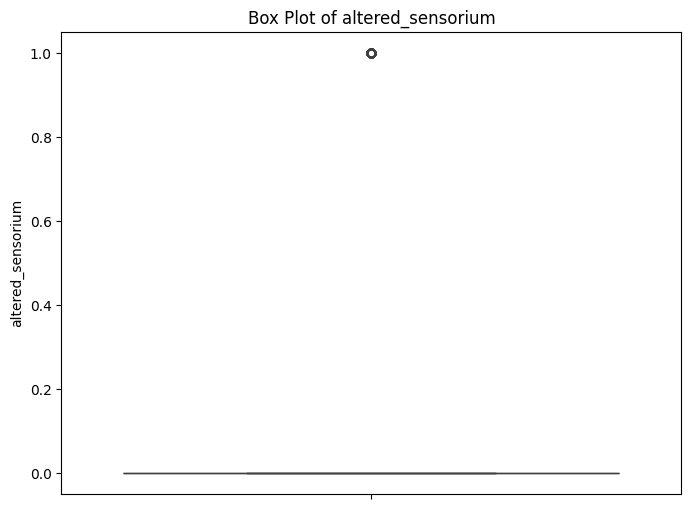

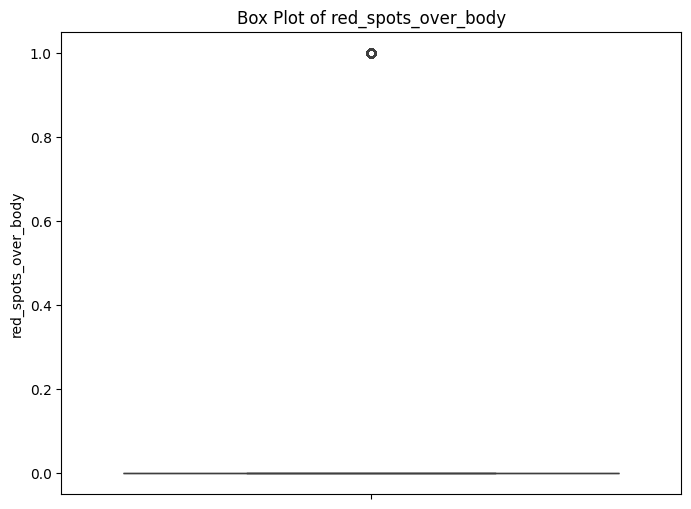

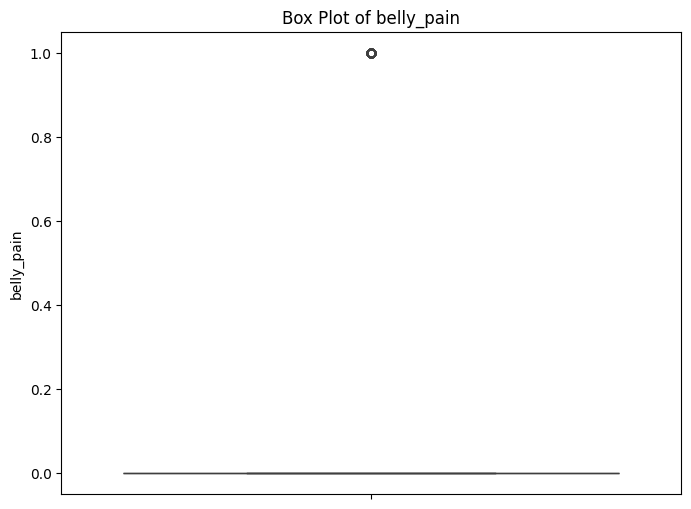

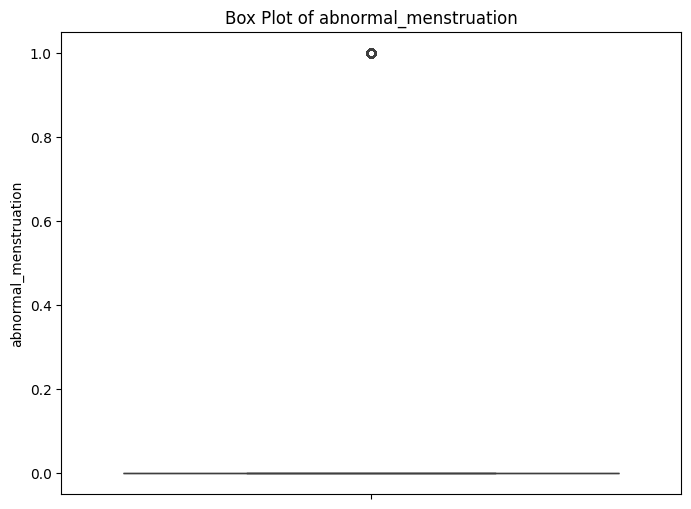

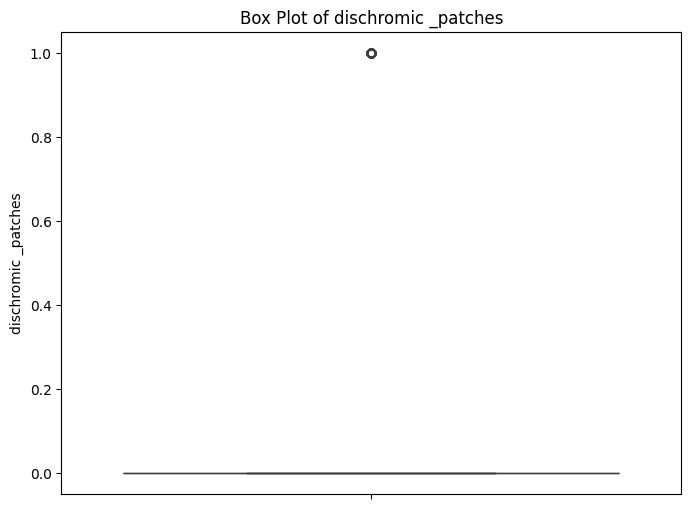

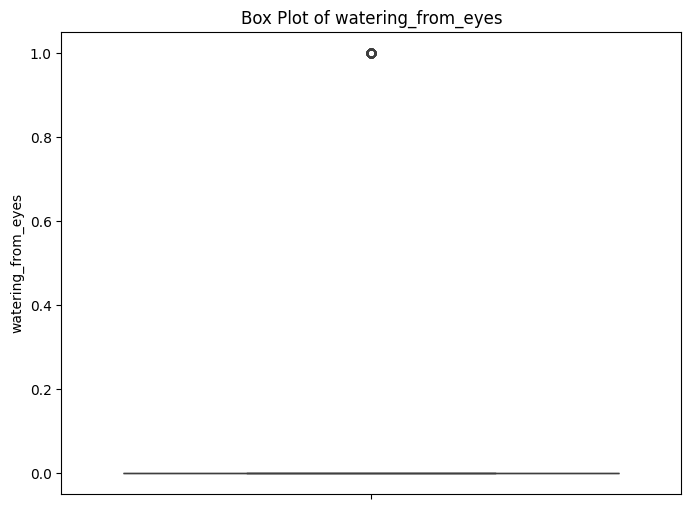

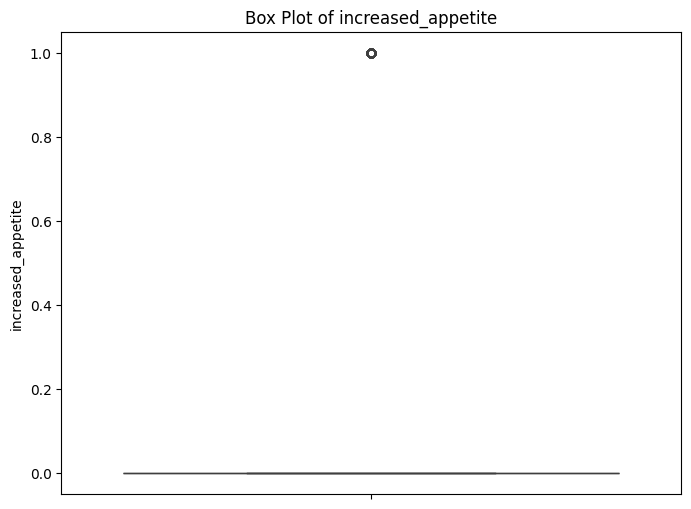

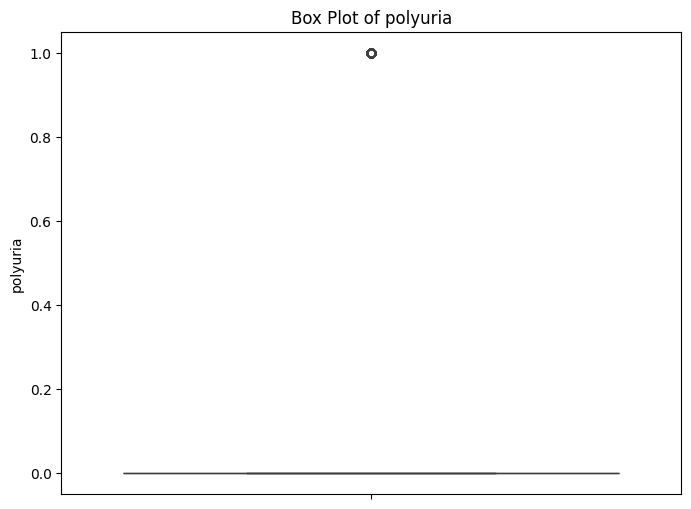

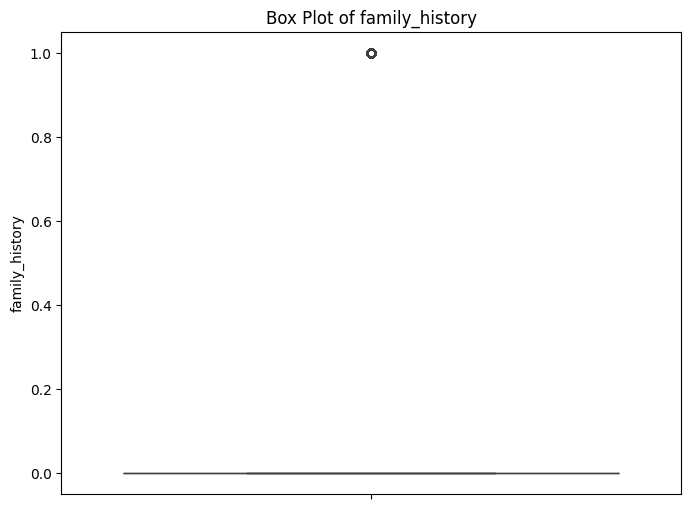

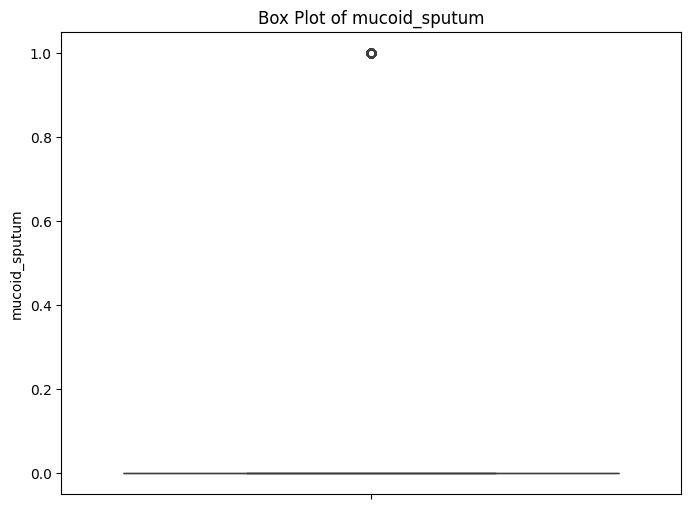

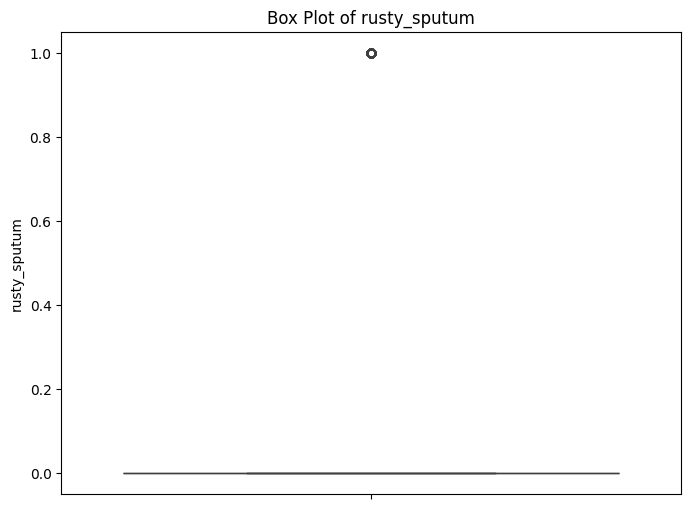

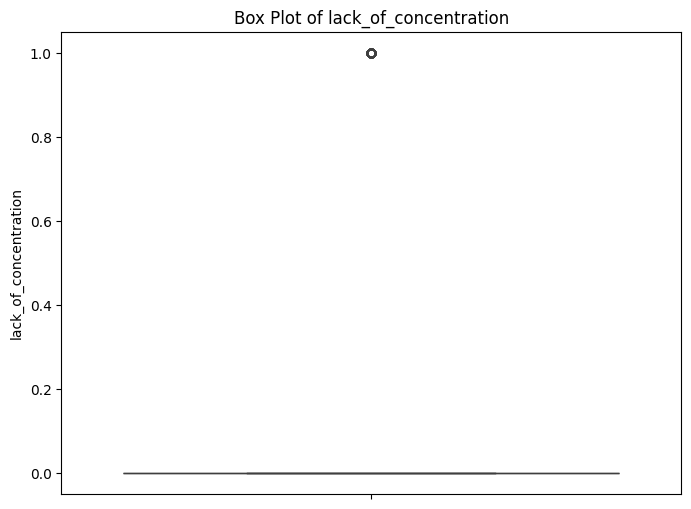

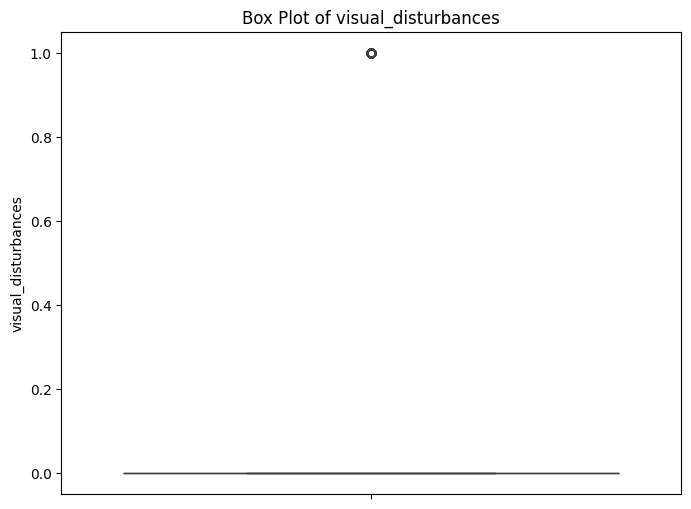

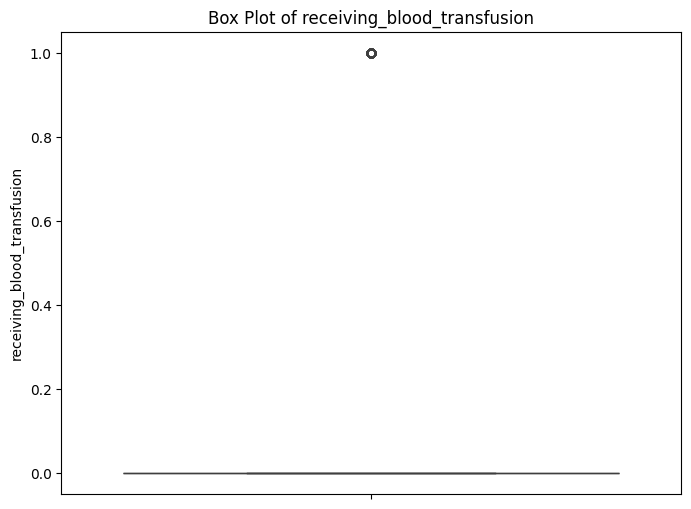

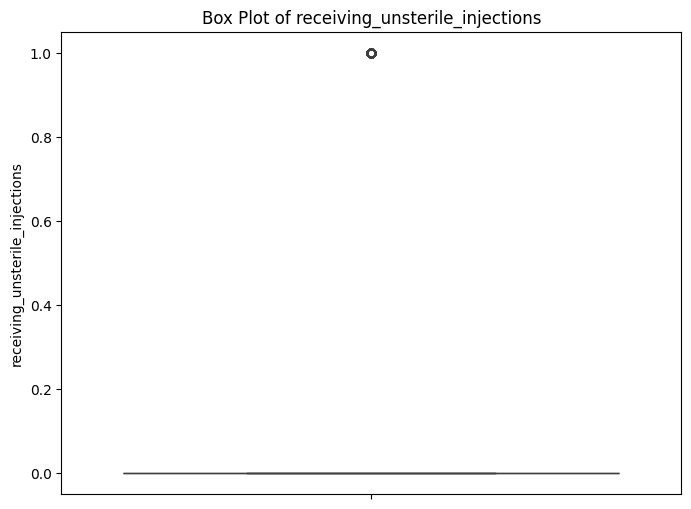

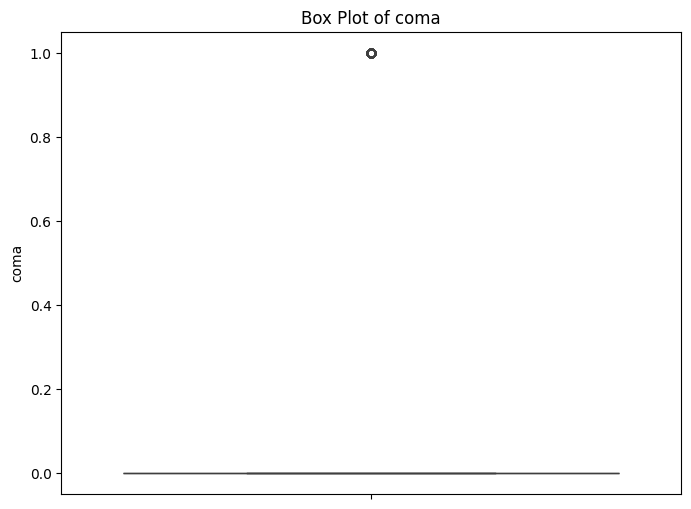

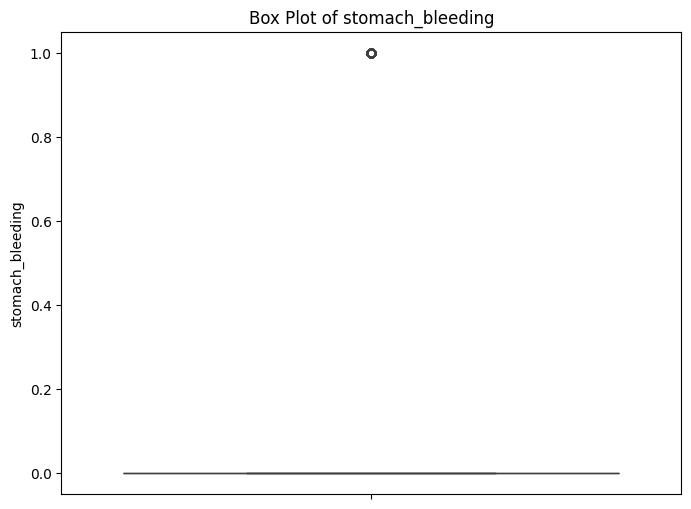

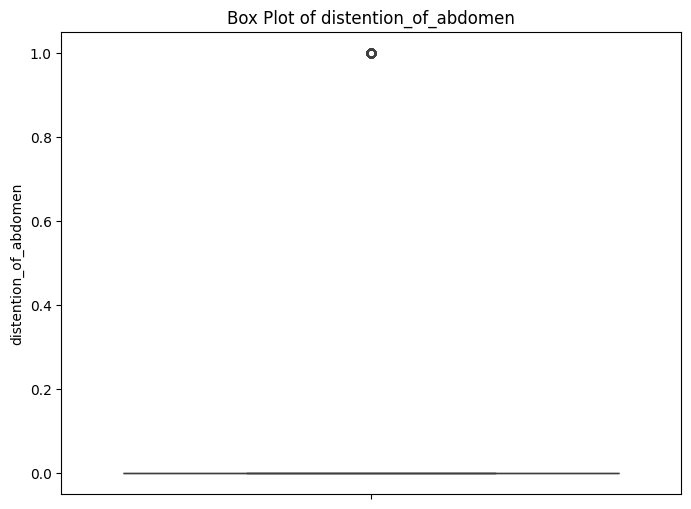

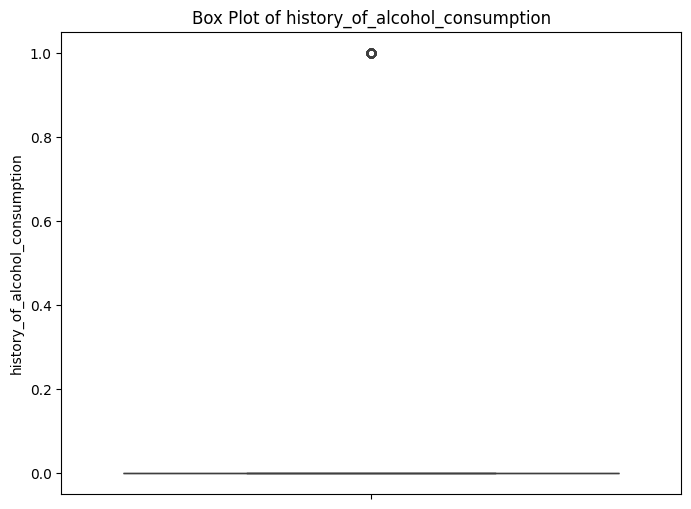

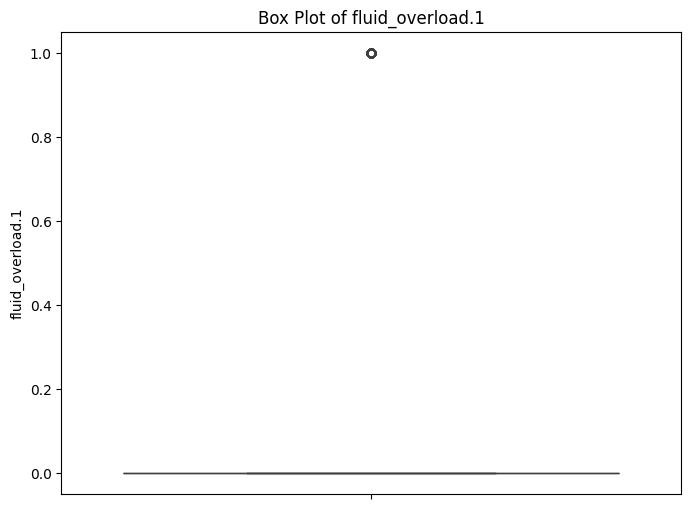

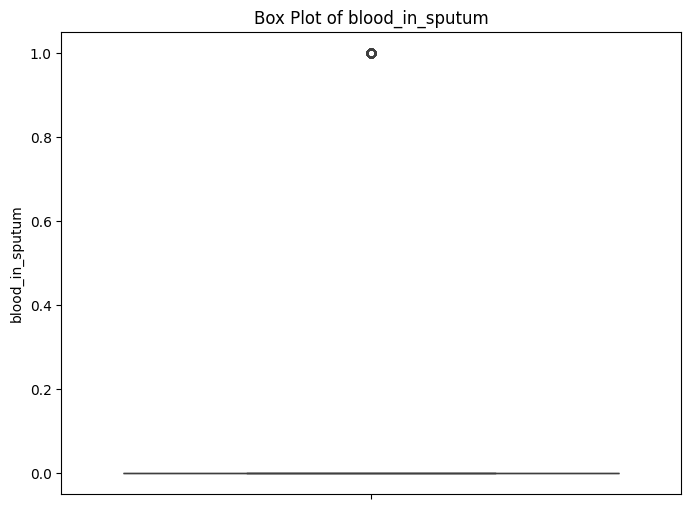

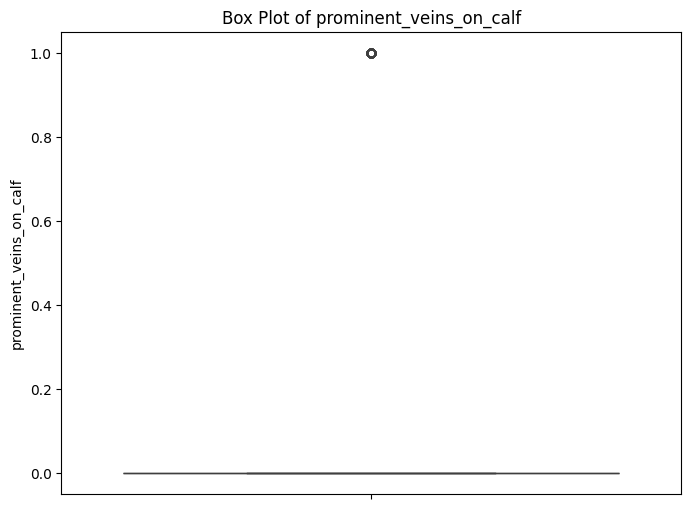

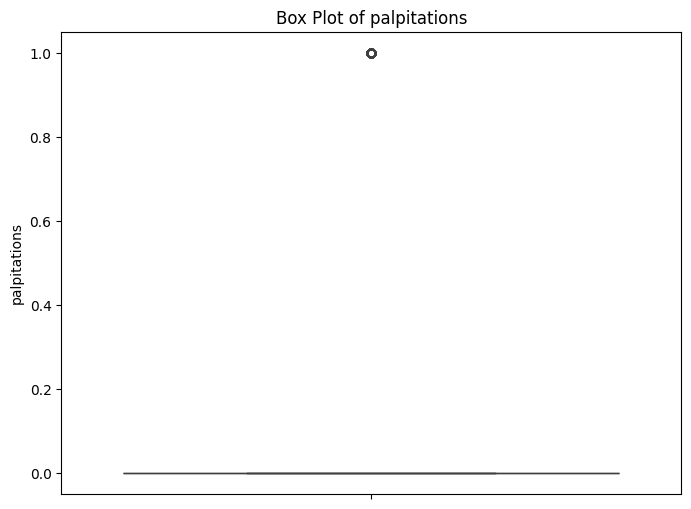

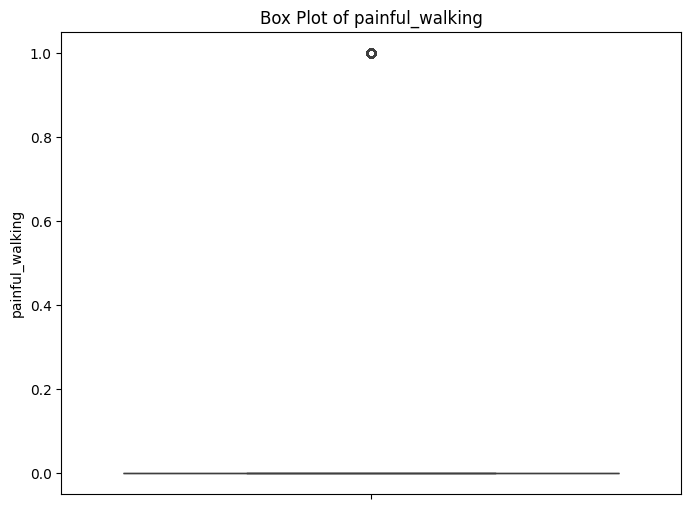

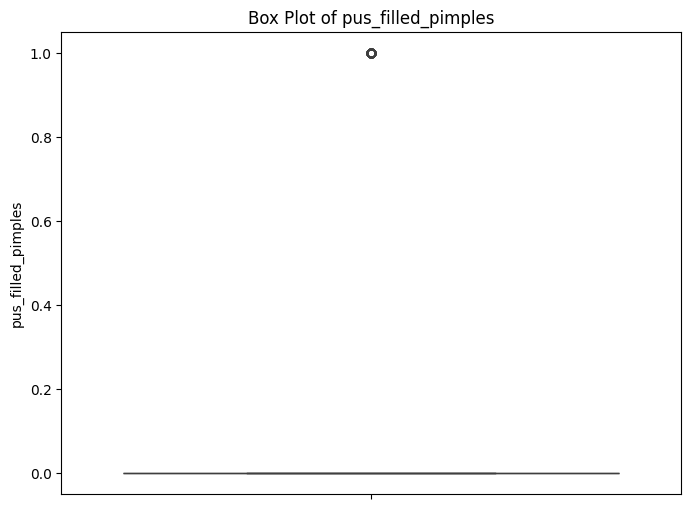

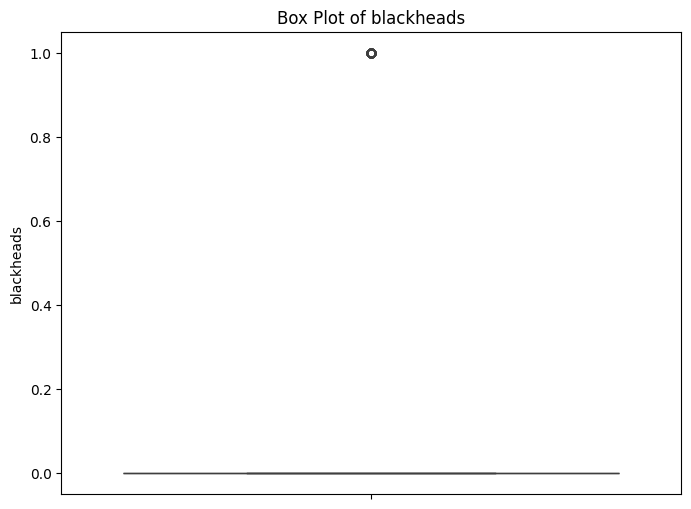

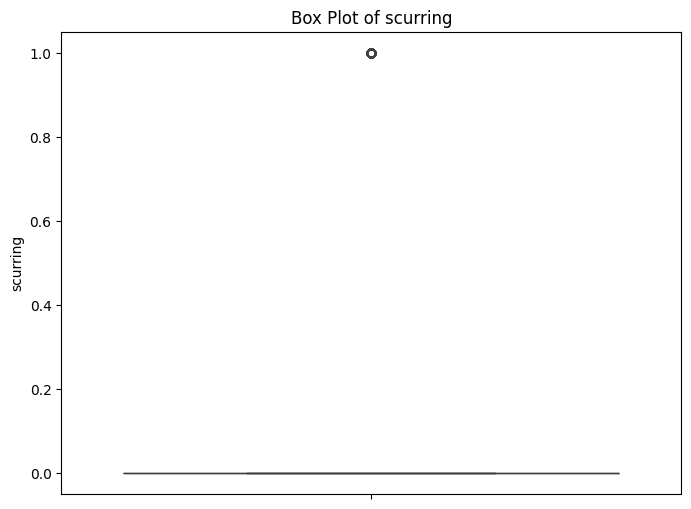

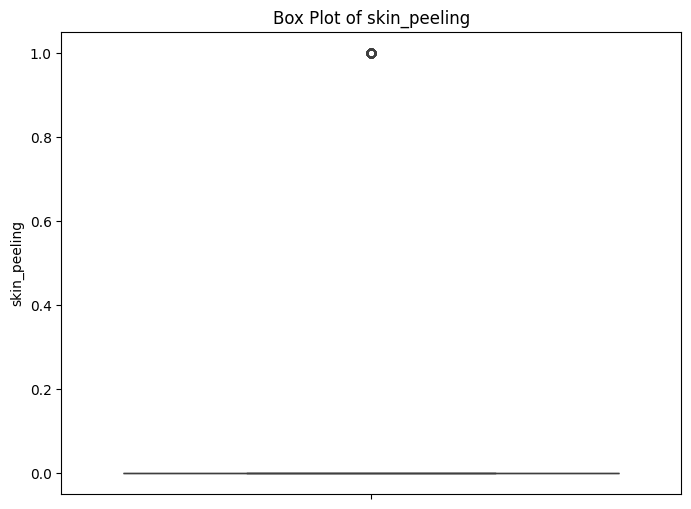

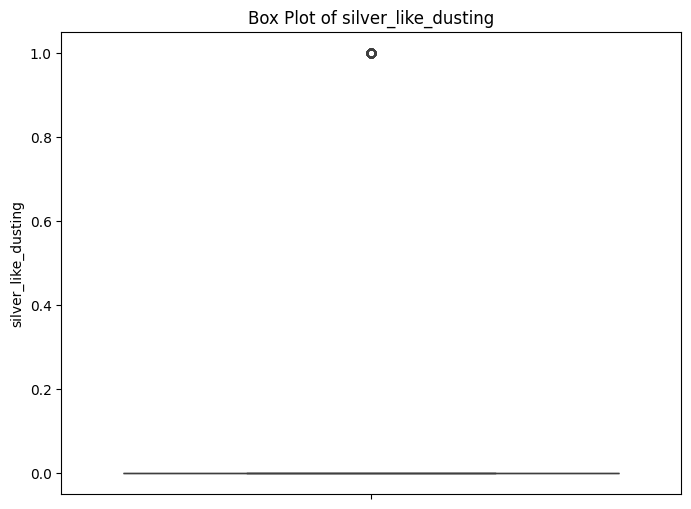

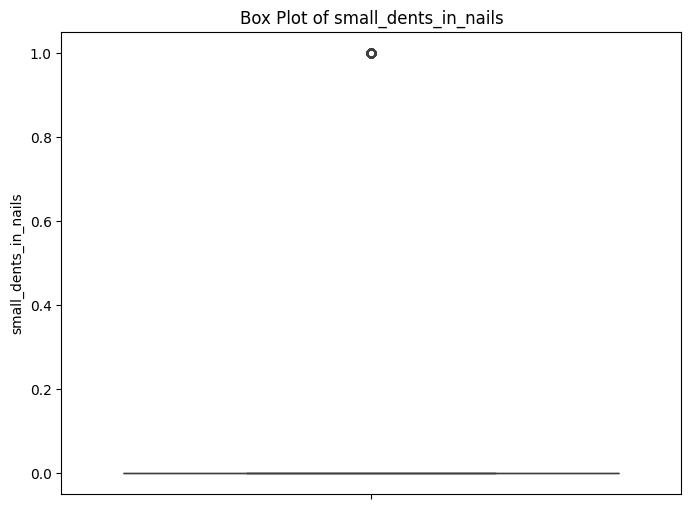

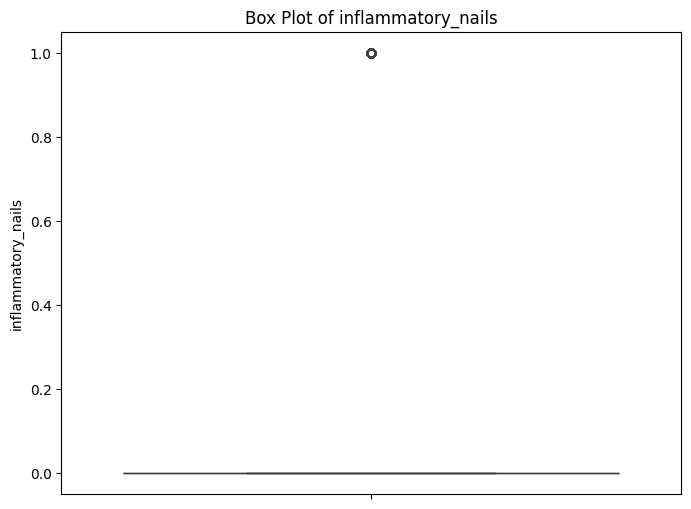

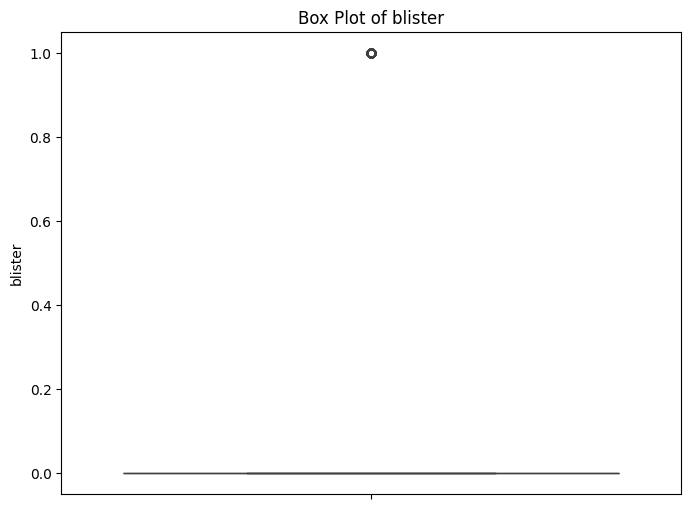

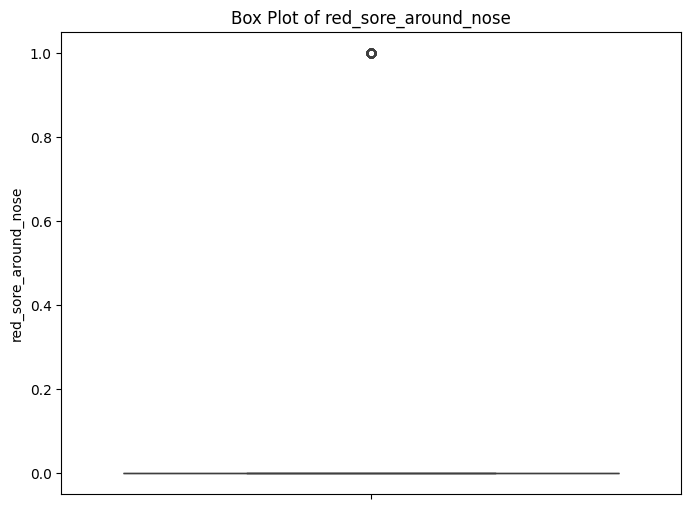

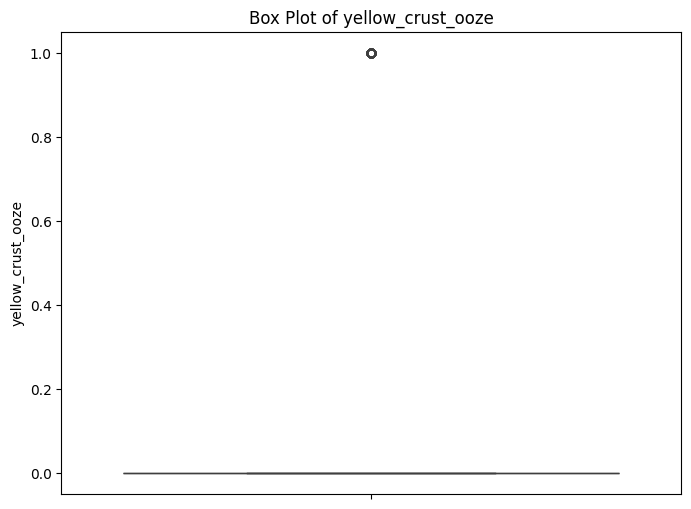

In [12]:
# Box plot to check for outliers in numerical features
if numerical_features:
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=data[feature])
        plt.title(f'Box Plot of {feature}')
        plt.ylabel(feature)
        plt.show()
else:
    print("No numerical features available for box plots.")


## REMOVING OUTLIERS

In [20]:

# Calculate Z-scores
z_scores = np.abs(stats.zscore(data[numerical_features]))

# Define a threshold for Z-scores (commonly 3 standard deviations away from the mean)
threshold = 3

# Create a boolean mask where True represents rows without outliers
outlier_mask = (z_scores < threshold).all(axis=1)

# Apply the mask to filter out outliers from the dataset
data_no_outliers = data[outlier_mask]

# Show the difference in size of the dataset after removing outliers
print(f"Original dataset size: {data.shape[0]} rows")
print(f"Dataset size after removing outliers: {data_no_outliers.shape[0]} rows")

# Display the first few rows of the dataset without outliers
print("\nDataset after removing outliers:")
display(data_no_outliers.head())

Original dataset size: 4920 rows

Dataset size after removing outliers: 0 rows



Dataset after removing outliers:


Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_of_stomach, swelled_lymph_nodes, malaise, blurred_and_distorted_vision, phlegm, throat_irritation, redness_of_eyes, sinus_pressure, runny_nose, congestion, chest_pain, weakness_in_limbs, fast_heart_rate, pain_during_bowel_movements, pain_in_anal_region, bloody_stool, irritation_in_anus, neck_pain, dizziness, cramps, bruising, obesity, swollen_legs, swollen_blood_vessels, puffy_face_and_eyes, enlarged_thyroid, brittle_nails, swollen_extremeties, excessive_hunger, extra_marital_contacts, drying_and_tingling_lips, slurred_speech, knee_pain, hip_joint_pain, muscle_weakness, stiff_neck, swelling_joints, movement_stiffness, spinning_movements, loss_of_balance, unsteadiness, weakness_of_one_body_side, loss_of_smell, bladder_discomfort, foul_smell_of urine, continuous_feel_of_urine, passage_of_gases, internal_itching, toxic_look_(typhos), depression, irritability, muscle_pain, altered_sensorium, red_spots_over_body, ...]
Index: []

[0 rows x 134 columns]

### After removing the outliers the dataset becomes empty so we keep the outliers

In [21]:
data.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  scurring  \
0       0           0             0        0                 0  ...         0   
1       0           0             0        0                 0  ...         0   
2       0           0             0        0                 0  ...         0   
3       0           0             0        0                 0  ...         0   
4       0           0             0        0                 0  ...         0   

   skin_peeling  silver_like_dusting  small_dents_in_nails  \
0             0                    0                     0   
1             0                    0                     0   
2             0                    0                     0   
3             0                    0                     0   
4             0                    0                     0   

   inflammatory_nails  blister  red_sore_around_nose  yellow_crust_ooze  \
0                   0        0                     0                  0   
1                   0        0                     0                  0   
2                   0        0                     0                  0   
3                   0        0                     0                  0   
4                   0        0                     0                  0   

          prognosis  prognosis_encoded  
0  Fungal infection                 15  
1  Fungal infection                 15  
2  Fungal infection                 15  
3  Fungal infection                 15  
4  Fungal infection                 15  

[5 rows x 134 columns]

## VISUALIZATIONS

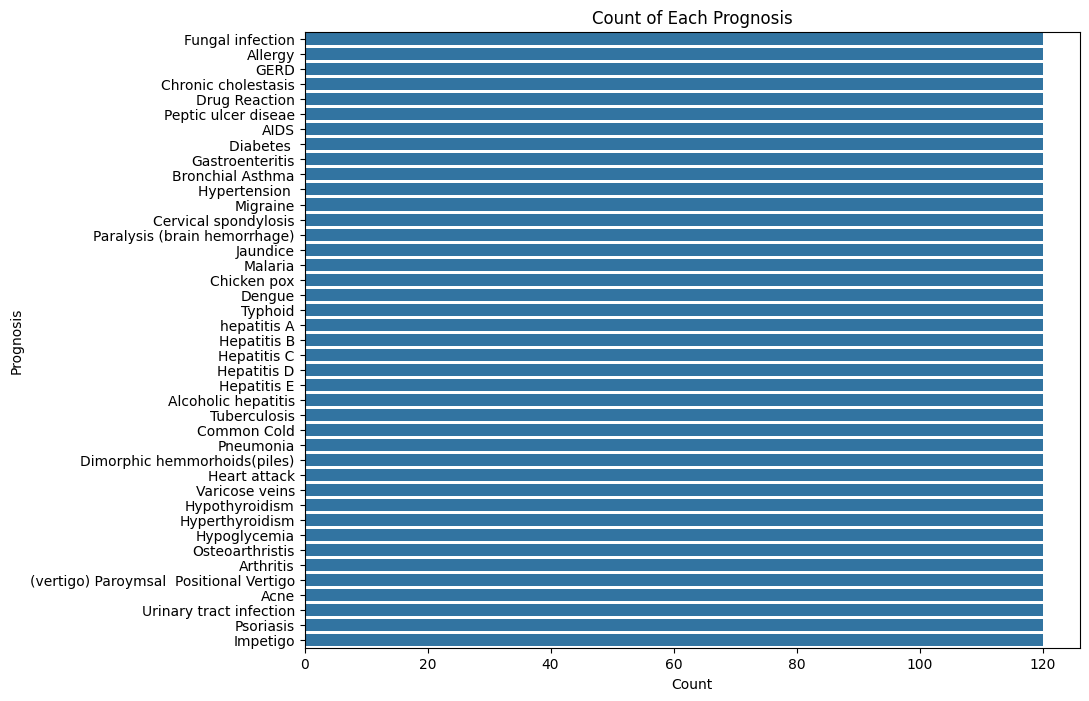

In [24]:

# Count plot of the target variable (prognosis)
plt.figure(figsize=(10, 8))
sns.countplot(y='prognosis', data=data, order=data['prognosis'].value_counts().index)
plt.title('Count of Each Prognosis')
plt.xlabel('Count')
plt.ylabel('Prognosis')
plt.show()


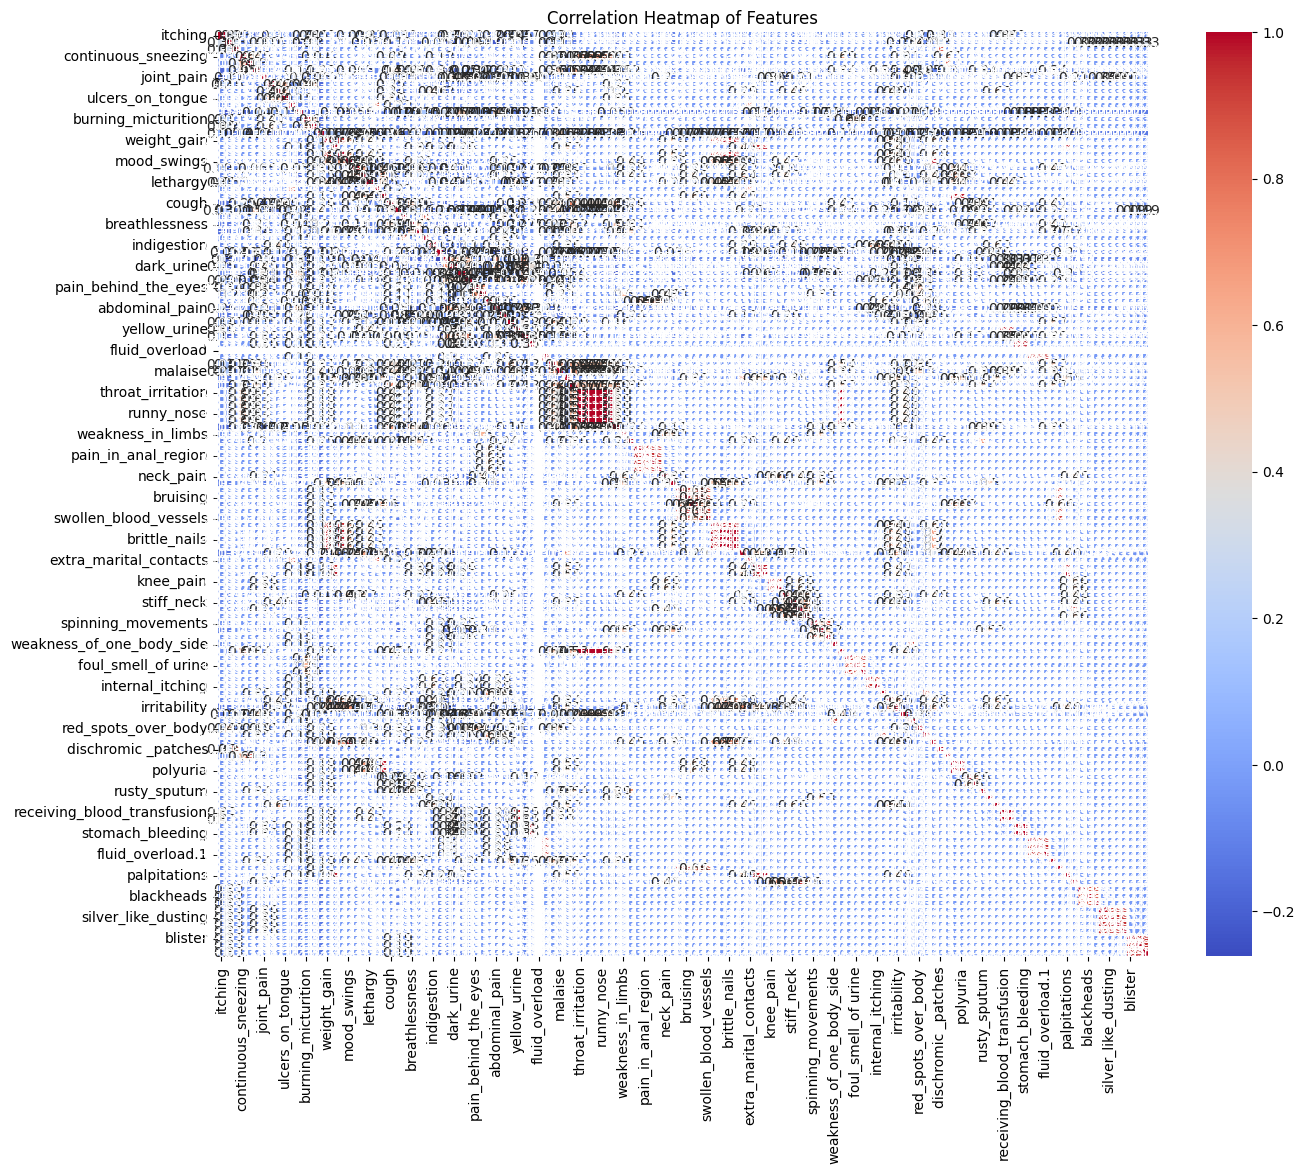

In [25]:
# Correlation heatmap of features
plt.figure(figsize=(15, 12))
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap of Features')
plt.show()


## Correlation Heatmap of Features
### The heatmap shows the correlation coefficients between different features.

## Insights:
### High correlation (close to 1 or -1) between features indicates that they are likely related. For example, if "itching" correlates strongly with "skin rash," it might suggest that individuals with one symptom often exhibit the other.
### Identifying correlated features can help in feature selection and reducing multicollinearity in predictive modeling

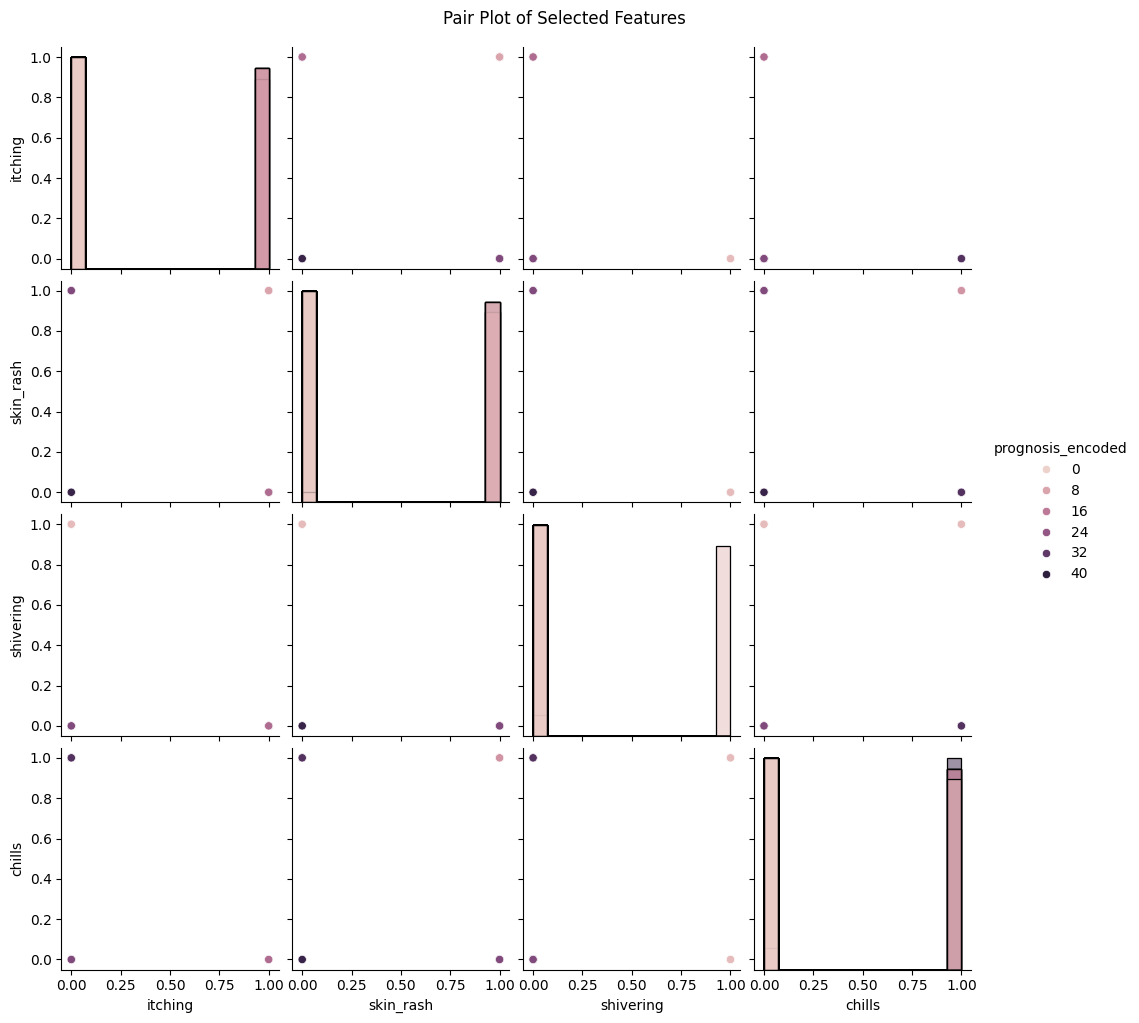

In [26]:
# Pair plot of selected features (including prognosis)
selected_features = ['itching', 'skin_rash', 'shivering', 'chills', 'prognosis_encoded']
sns.pairplot(data[selected_features], hue='prognosis_encoded', diag_kind='hist')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()


## Pair Plot of Selected Features
### The pair plot visualizes pairwise relationships between selected features.

## Insights:
### The plot shows the distribution of each feature along the diagonal and scatter plots for feature pairs.
### If certain features show distinct clusters or patterns, this could indicate potential for classification. However, if most features show limited variance, it suggests that they might not be very informative.

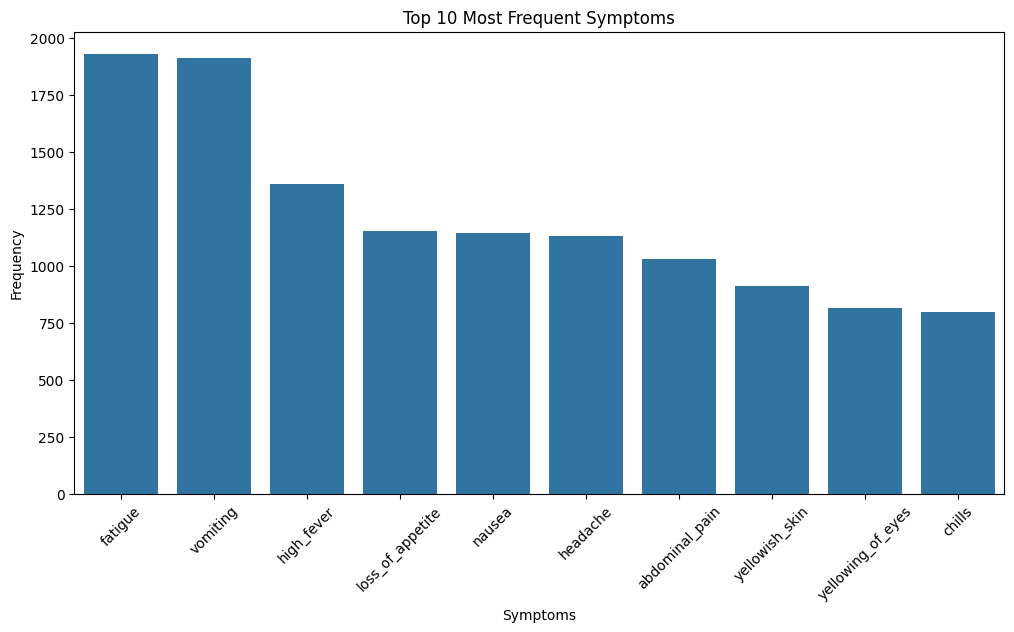

In [27]:
# Bar plot of symptom frequency
symptom_sums = data[features].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=symptom_sums.index[:10], y=symptom_sums.values[:10])
plt.title('Top 10 Most Frequent Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


 ## Bar Plot of Symptom Frequency
### This bar plot displays the top 10 most frequent symptoms.

## Insights:
### Symptoms like "fatigue" and "vomiting" appear to be the most common.
### This information can guide healthcare practitioners in identifying and prioritizing symptoms for further investigation or treatment.

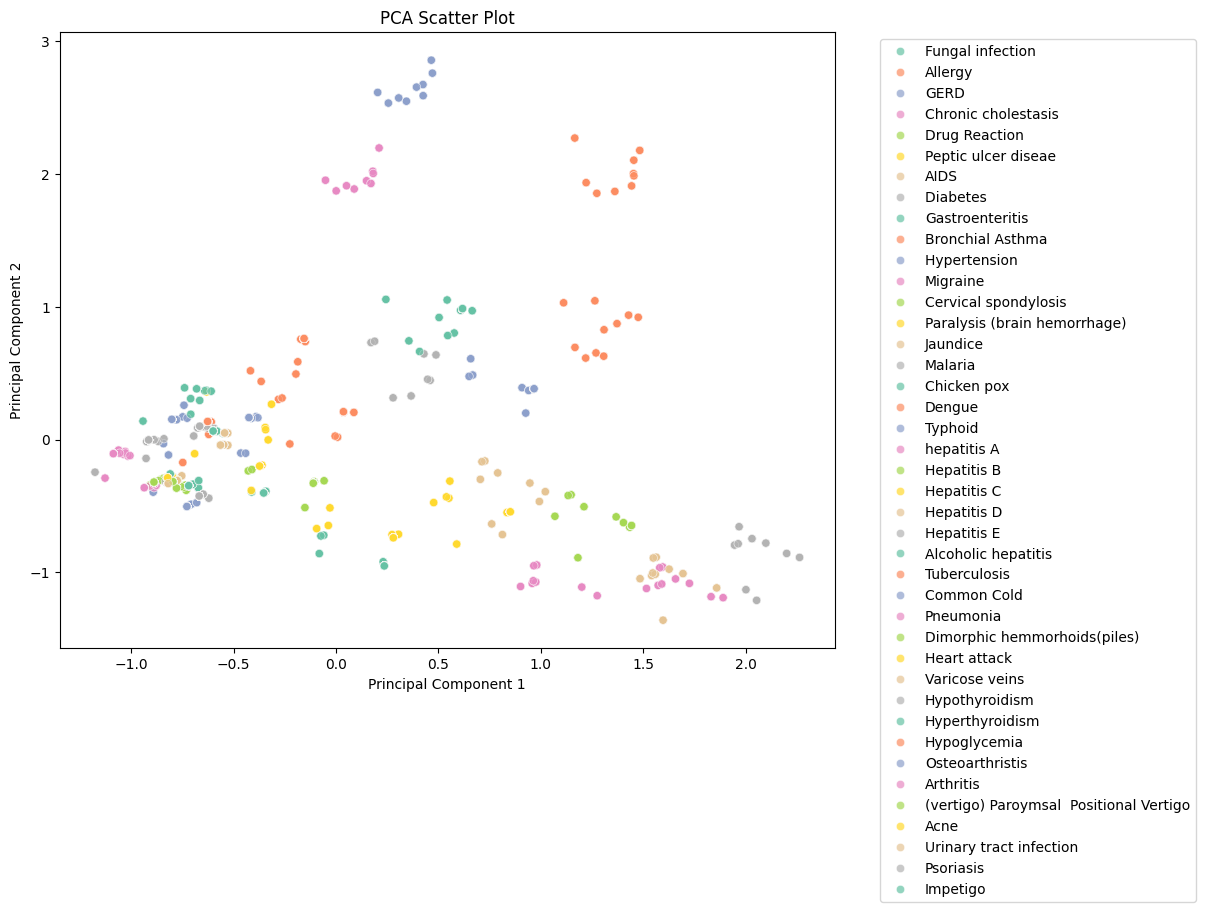

In [28]:
# PCA scatter plot for dimensionality reduction visualization

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[features])
data['pca_one'] = pca_result[:, 0]
data['pca_two'] = pca_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca_one', y='pca_two', hue='prognosis', data=data, palette='Set2', alpha=0.7)
plt.title('PCA Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


## PCA Scatter Plot
### The PCA scatter plot visualizes the results of Principal Component Analysis, reducing the dimensions of the feature space.

### Insights:
### The plot helps visualize how different prognoses cluster in reduced dimensions.
### If certain diseases cluster together, it may indicate that they share common symptoms or characteristics. This can provide insights for further analysis or modeling strategies.

## Tranining and testing the dataset
### 1. Random Forest

In [33]:

train_data = pd.read_csv('Training.csv')  # Assuming the uploaded dataset is for training
test_data = pd.read_csv('Testing.csv')    # Load testing dataset (replace with actual file path)

# Drop the 'Unnamed: 133' column if it exists in either dataset
train_data = train_data.drop(columns=['Unnamed: 133'], errors='ignore')
test_data = test_data.drop(columns=['Unnamed: 133'], errors='ignore')

# Separate features and target
X_train = train_data.drop(columns=['prognosis'], errors='ignore')  # Drop target
y_train = train_data['prognosis']

X_test = test_data.drop(columns=['prognosis'], errors='ignore')  # Drop target
y_test = test_data['prognosis']

# Align columns: make sure X_train and X_test have the same columns
X_test = X_test[X_train.columns]  # Ensure X_test has the same columns as X_train

# Random Forest Classifier with specified hyperparameters
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)

# Start timing for model training
start_time = time.time()

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)

# Calculate training duration
training_duration = time.time() - start_time

# Make predictions for training and testing sets
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Training Duration (s): {training_duration}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]

Mean CV Score: 1.0

Training Accuracy: 1.0

Test Accuracy: 0.9761904761904762

Test Precision: 0.9880952380952381

Test Recall: 0.9761904761904762

Test F1 Score: 0.9761904761904762

Training Duration (s): 22.60666847229004


In [13]:
# Import necessary libraries for XGBoost
import xgboost as xgb
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load datasets
train_data = pd.read_csv('Training.csv')  
test_data = pd.read_csv('Testing.csv')   

# Drop the 'Unnamed: 133' column if it exists
train_data = train_data.drop(columns=['Unnamed: 133'], errors='ignore')
test_data = test_data.drop(columns=['Unnamed: 133'], errors='ignore')

# Separate features and target
X_train = train_data.drop(columns=['prognosis'], errors='ignore')  
y_train = train_data['prognosis']
X_test = test_data.drop(columns=['prognosis'], errors='ignore')  
y_test = test_data['prognosis']

# Align columns
X_test = X_test[X_train.columns]  

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)

# Start timing for training
start_time = time.time()

# Train the model
xgb_model.fit(X_train, y_train)

# Cross-validation with 5 folds
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)

# Calculate training duration
training_duration = time.time() - start_time

# Predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Training Duration (s): {training_duration}")


ModuleNotFoundError: No module named 'xgboost'

In [14]:
# Import necessary libraries for SVM
from sklearn.svm import SVC
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load datasets
train_data = pd.read_csv('Training.csv')  
test_data = pd.read_csv('Testing.csv')   

# Drop the 'Unnamed: 133' column if it exists
train_data = train_data.drop(columns=['Unnamed: 133'], errors='ignore')
test_data = test_data.drop(columns=['Unnamed: 133'], errors='ignore')

# Separate features and target
X_train = train_data.drop(columns=['prognosis'], errors='ignore')  
y_train = train_data['prognosis']
X_test = test_data.drop(columns=['prognosis'], errors='ignore')  
y_test = test_data['prognosis']

# Align columns
X_test = X_test[X_train.columns]  

# SVM Classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)

# Start timing for training
start_time = time.time()

# Train the model
svm_model.fit(X_train, y_train)

# Cross-validation with 5 folds
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Calculate training duration
training_duration = time.time() - start_time

# Predictions
y_pred_train = svm_model.predict(X_train)
y_pred_test = svm_model.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Training Duration (s): {training_duration}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]

Mean CV Score: 1.0

Training Accuracy: 1.0

Test Accuracy: 1.0

Test Precision: 1.0

Test Recall: 1.0

Test F1 Score: 1.0

Training Duration (s): 1.4172539710998535


In [15]:
# Import necessary libraries for CatBoost
from catboost import CatBoostClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load datasets
train_data = pd.read_csv('Training.csv')  
test_data = pd.read_csv('Testing.csv')   

# Drop the 'Unnamed: 133' column if it exists
train_data = train_data.drop(columns=['Unnamed: 133'], errors='ignore')
test_data = test_data.drop(columns=['Unnamed: 133'], errors='ignore')

# Separate features and target
X_train = train_data.drop(columns=['prognosis'], errors='ignore')  
y_train = train_data['prognosis']
X_test = test_data.drop(columns=['prognosis'], errors='ignore')  
y_test = test_data['prognosis']

# Align columns
X_test = X_test[X_train.columns]  

# CatBoost Classifier
cat_model = CatBoostClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42, verbose=0)

# Start timing for training
start_time = time.time()

# Train the model
cat_model.fit(X_train, y_train)

# Cross-validation with 5 folds
cv_scores = cross_val_score(cat_model, X_train, y_train, cv=5)

# Calculate training duration
training_duration = time.time() - start_time

# Predictions
y_pred_train = cat_model.predict(X_train)
y_pred_test = cat_model.predict(X_test)

# Evaluation Metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Training Duration (s): {training_duration}")


Cross-Validation Scores: [1. 1. 1. 1. 1.]

Mean CV Score: 1.0

Training Accuracy: 1.0

Test Accuracy: 1.0

Test Precision: 1.0

Test Recall: 1.0

Test F1 Score: 1.0

Training Duration (s): 329.6894094944
